# Analysis figure 1

In [6]:
#Import packages and utils
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import os
import glob
import utils.CaAnaly as CaaN
import utils.Plotting as Pl
import utils.GRABAnaly as GRAB
import utils.BehavAnaly as BA
import scipy.signal as signal



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
Save_path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Analysis/Paper_figures/Figure_1/Plots/Final_panels/'

## Sleep-wake GRAB analysis

### Trace example

In [216]:
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/'
date = '2023-07-15'
animals = ['440','441','442','443']
recording = 't-001'
sleep_GRAB = np.zeros([4,4])
sleep_GRAB[sleep_GRAB==0]=np.nan

animal = '441'
grab = GRAB.GRAB_dataload(path + date + '/' + date + '_' + 'GOS' + animal + '_' +recording , detrend_both=False, detrend_CH2=False, only_CH3=True)

In [273]:
beh = BA.movement_extract(['2023-07-15'],[animal],['t-001'], DLC_model_name='DLC-resnet50-Pup-Tracking-P7-11-SSRIs-2023-06-27Jun27shuffle1-500000.csv',confidence_filter=True,confidence_threshold=0.9)

In [47]:
1250/30

41.666666666666664

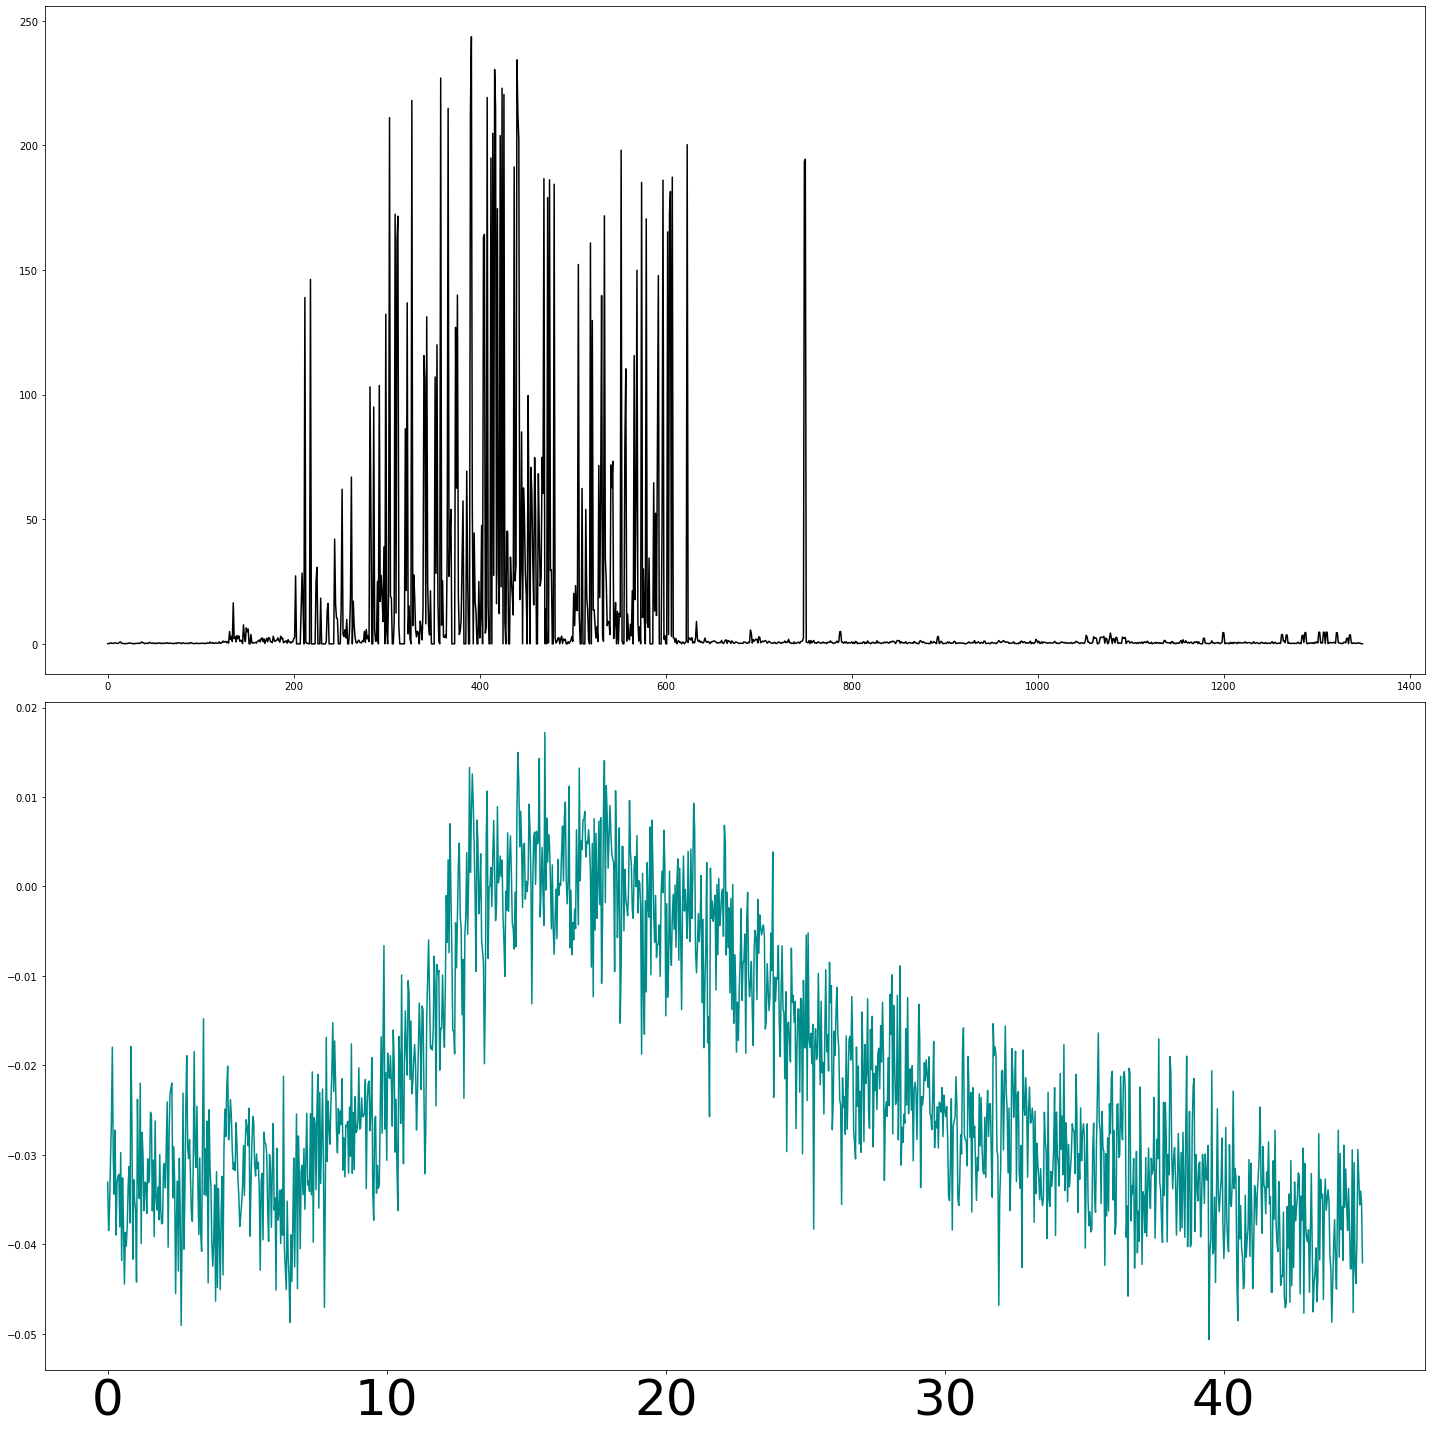

In [278]:
thres = 6250#20000#31000
thres2= 7600

plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.plot(beh[thres:thres2],color='black')
#Plot grab in y axis other side
ax = plt.gca()
#ax.axis('off')
plt.subplot(2,1,2)

plt.plot(grab[thres:thres2],color='darkcyan')
plt.xticks (np.arange(0,1201,300),np.arange(0,41,10),fontsize=50)
#Remove all axis
ax = plt.gca()
#ax.axis('off')
plt.tight_layout()
#save figure
#plt.savefig(Save_path + 'Figure_40s.svg', dpi=300, transparent=True,format="svg",bbox_inches='tight')

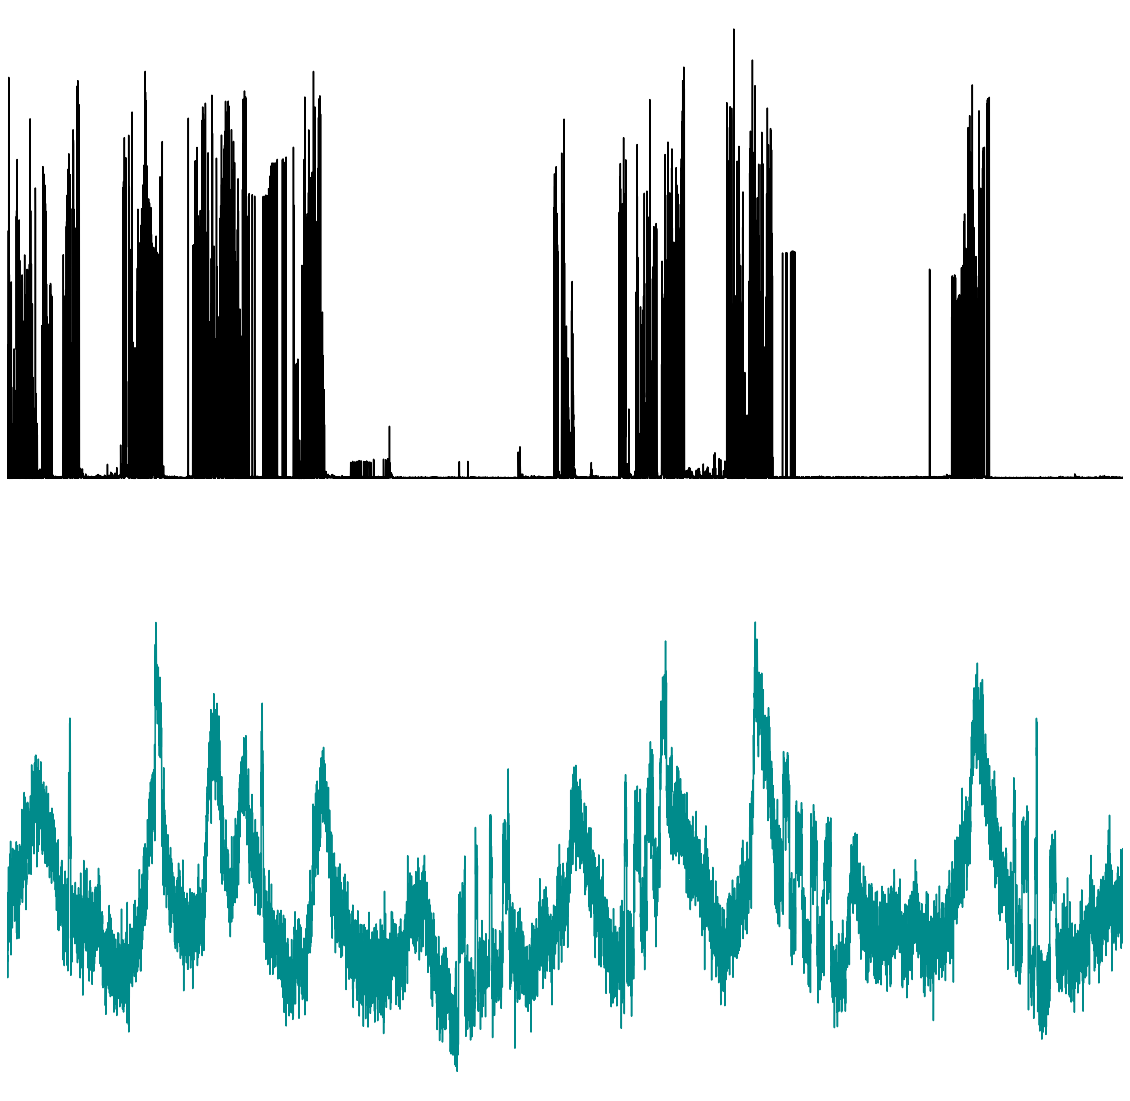

In [249]:
thres = 13000#31000
thres2= 24500

plt.figure(figsize=(20,20))

plt.subplot(2,1,1)
plt.plot(beh[thres:thres2],color='black')
#Plot grab in y axis other side
#ax2 = plt.twinx()
plt.subplot(2,1,2)
plt.plot(grab[thres:thres2],color='darkcyan')
for i in range(2):
    plt.subplot(2,1,i+1)
    plt.xticks([])
    plt.yticks([])
    #remove lines
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.xlim([0,thres2-thres])
    plt.savefig(Save_path + 'GRAB_behav_example.svg',dpi=300)
    



### New approach whisker responses

In [ ]:
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/'
dates = ['2023-07-15']
animals = ['440','441','442','443','444']
recordings = ['t-002']

plt.figure(figsize=(20,20))
PeriStim = np.zeros((len(animals),10,960))
for animal in animals:
    for date in dates:
        for recording in recordings:
            grab = GRAB.GRAB_dataload(path + date + '/' + date + '_' + 'GOS' + animal + '_' +recording , detrend_both=False, detrend_CH2=False, only_CH3=True)
            paq = CaaN.paq_read_function(path + date + '/' + date + '_' + 'GOS' + animal + '_' + recording.replace('-','_') + '.paq')
            Meta = CaaN.paq_extract(paq, channel_to_Extract = 'Whisker_in')#'Sound_in'
            PeriStim[animals.index(animal),:,:] = GRAB.PeriStimFrames(grab,Meta,minus_fr=2,plus_fr=30,hz=30) # 30.49

    

<Figure size 1440x1440 with 0 Axes>

In [ ]:
path_sleep = 'C:/Users/gabrielos/Desktop/SERTKO_GRAB_recov/Sleep_wake_manual_scoring.csv'
#Load sleep scoring with numpy genfromtxt
sleep_scoring = np.genfromtxt(path_sleep,delimiter=',',usecols = np.arange(0,61))
sleep_scoring = sleep_scoring[1:,3:]

In [1037]:
sleep = np.zeros((3,len(animals),960))
for animal in range(len(animals)):
    for sleep_state in range(3):
        index = [(sleep_scoring[7+9*animal,:][~np.isnan(sleep_scoring[7+9*animal,:])].astype(int)) == sleep_state][0]
        tmp = PeriStim[animal,:len(index),:]
        sleep[sleep_state, animal] = np.nanmean(tmp[index,:],0)

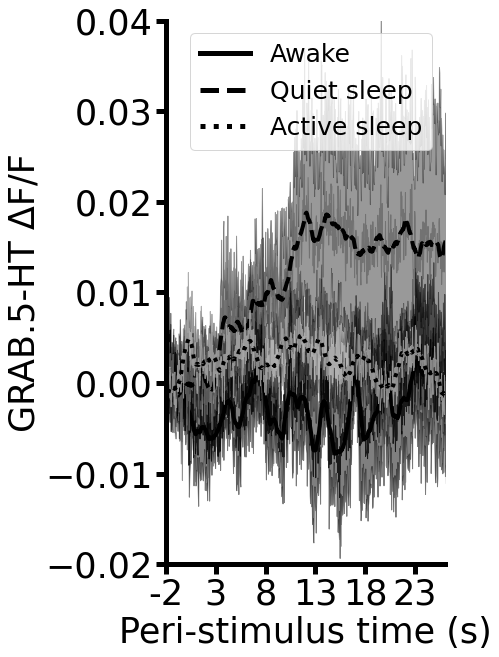

In [1100]:
plt.figure(figsize=(5,10))
#Baseline
#sleep = sleep-np.nanmean(sleep[:,:,:60],2)[:,:,np.newaxis]
plt.plot(np.nanmean(sleep[0,:,:],0), color='k',lw=1,alpha=0.8)#,linestyle='-')
#Shade SEM
plt.fill_between(np.arange(960),np.nanmean(sleep[0,:,:],0)-stats.sem(sleep[0,:,:],0,nan_policy='omit'),np.nanmean(sleep[0,:,:],0)+stats.sem(sleep[0,:,:],0,nan_policy='omit'),alpha=0.5,color='black')
#Savgol filter
from scipy.signal import savgol_filter
plt.plot(savgol_filter(np.nanmean(sleep[0,:,:],0),51,3), color='k',lw=4,label='Awake')#linestyle='--')

plt.plot(np.nanmean(sleep[1,:,:],0), color='dimgray',lw=1,alpha =0.8) #linestyle='--')
plt.fill_between(np.arange(960),np.nanmean(sleep[1,:,:],0)-stats.sem(sleep[1,:,:],0,nan_policy='omit'),np.nanmean(sleep[1,:,:],0)+stats.sem(sleep[1,:,:],0,nan_policy='omit'),alpha=0.4,color='black')
#savgol
plt.plot(savgol_filter(np.nanmean(sleep[1,:,:],0),51,3), color='k',lw=4,label='Quiet sleep',linestyle='--')

plt.plot(np.nanmean(sleep[2,:,:],0),color='darkgray',lw=1,alpha=0.8)#linestyle=':')
plt.fill_between(np.arange(960),np.nanmean(sleep[2,:,:],0)-stats.sem(sleep[2,:,:],0,nan_policy='omit'),np.nanmean(sleep[2,:,:],0)+stats.sem(sleep[2,:,:],0,nan_policy='omit'),alpha=0.3,color='black')
#sav gol
plt.plot(savgol_filter(np.nanmean(sleep[2,:,:],0),51,3), color='k',lw=4,label='Active sleep',linestyle=':')
plt.xlim([0,840])
plt.ylim([-0.02,0.04])
leg = plt.legend(fontsize=25)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
#Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('GRAB.5-HT ΔF/F',fontsize=35)
#Make axis thicker
plt.gca().spines['left'].set_linewidth(5)
plt.gca().spines['bottom'].set_linewidth(5)
#Make ticks thicker and longer
plt.tick_params(width=5,length=10)
plt.xticks(np.arange(0,840,150),np.arange(-2,26,5),fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel('Peri-stimulus time (s)',fontsize=35)
plt.savefig(Save_path + 'GRAB_5HT_sleep_whisker_response.svg',bbox_inches='tight',dpi=300)

F_onewayResult(statistic=3.178959994660999, pvalue=0.07800934655310277)


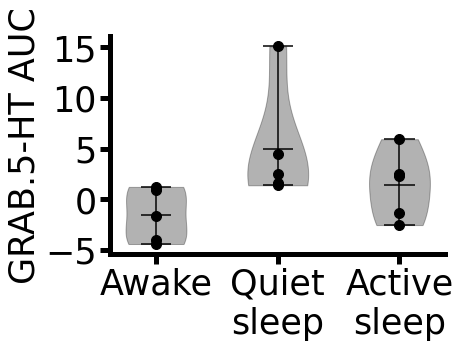

In [1101]:
AUC = np.trapz(sleep[:,:,120:570],axis=2)
#AUC =np.nanmean(AUC,1)
vp = plt.violinplot(AUC.T,showmeans=True)
#Scatter
plt.scatter(np.ones(5),AUC[0,:],s=100,color='k')
plt.scatter(np.ones(5)*2,AUC[1,:],s=100,color='k')
plt.scatter(np.ones(5)*3,AUC[2,:],s=100,color='k')
#Set colors black
for pc in vp['bodies']:
    pc.set_facecolor('k')
    pc.set_edgecolor('k')
    pc.set_alpha(0.3)
#Make edges black
for partname in ('cbars','cmins','cmaxes','cmeans'):
    vp[partname].set_edgecolor('k')
#Anova
print(stats.f_oneway(AUC[0,:],AUC[1,:],AUC[2,:]))
#Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('GRAB.5-HT ΔF/F',fontsize=35)
#Make axis thicker
plt.gca().spines['left'].set_linewidth(5)
plt.gca().spines['bottom'].set_linewidth(5)
#Make ticks thicker and longer
plt.tick_params(width=5,length=10)
plt.xticks([1,2,3],['Awake','Quiet\nsleep','Active\nsleep'],fontsize=35)
plt.yticks(np.arange(-5,16,5),fontsize=35)
#plt.xlabel('Sleep state',fontsize=35)
plt.ylabel('GRAB.5-HT AUC',fontsize=35)

#Save figure
plt.savefig(Save_path + 'GRAB_5HT_sleep_scoring_whiser_response_violin_plot.svg',bbox_inches='tight',dpi=300)

In [1080]:
#Run normality test
for i in range(3):
    print(stats.shapiro(np.nanmean(sleep[i,:,90:600],1)-np.nanmean(sleep[i,:,:50],1)))

#Run paired t-test pre-post stimulus
print('Awake: ')
print(stats.ttest_rel(np.nanmean(sleep[0,:,450:510],1),np.nanmean(sleep[0,:,:50],1)))
#Run Wilcoxon test
print('Quiet sleep: ')
print(stats.wilcoxon(np.nanmean(sleep[1,:,420:510],1),np.nanmean(sleep[1,:,:50],1)))
#Run paired t-test pre-post stimulus
print('Active sleep: ')
print(stats.ttest_rel(np.nanmean(sleep[2,:,360:660],1),np.nanmean(sleep[2,:,:50],1)))


ShapiroResult(statistic=0.8990873694419861, pvalue=0.4048618972301483)
ShapiroResult(statistic=0.7327622175216675, pvalue=0.020447060465812683)
ShapiroResult(statistic=0.9563852548599243, pvalue=0.7826151847839355)
Awake: 
Ttest_relResult(statistic=-1.5381968967537338, pvalue=0.19882510121244157)
Quiet sleep: 
WilcoxonResult(statistic=0.0, pvalue=0.0625)
Active sleep: 
Ttest_relResult(statistic=0.9173888698185896, pvalue=0.41084764196961715)


## Sensory responses across development in WT

### P7-10

In [ ]:
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/'
dates = ['2023-07-15']
animals = ['440','441','442','443','444']
recordings = ['t-002']
channel = 'Sound_in'
plt.figure(figsize=(20,20))
PeriStim = np.zeros((3,len(animals)+1,10,1050))
for i in range(3):
    if i == 1:
        channel = 'Whisker_in'
    elif i == 2:
        recordings = ['t-003']
    for animal in animals:
        for date in dates:
            for recording in recordings:
                grab = GRAB.GRAB_dataload(path + date + '/' + date + '_' + 'GOS' + animal + '_' +recording , detrend_both=False, detrend_CH2=False, only_CH3=True)
                paq = CaaN.paq_read_function(path + date + '/' + date + '_' + 'GOS' + animal + '_' + recording.replace('-','_') + '.paq')
                Meta = CaaN.paq_extract(paq, channel_to_Extract = channel)#'Sound_in'
                PeriStim[i,animals.index(animal),:,:] = GRAB.PeriStimFrames(grab,Meta,minus_fr=5,plus_fr=30,hz=30) # 30.49


    date = '2023-04-20'
    animal = '391'

    grab = GRAB.GRAB_dataload(path + date + '/' + date + '_' + 'GOS' + animal + '_' +recording , detrend_both=False, detrend_CH2=False, only_CH3=True)
    paq = CaaN.paq_read_function(path + date + '/' + date + '_' + 'GOS' + animal + '_' + recording.replace('-','_') + '.paq')
    Meta = CaaN.paq_extract(paq, channel_to_Extract = channel)#'Sound_in'
    PeriStim[i,-1,:,:] = GRAB.PeriStimFrames(grab,Meta,minus_fr=5,plus_fr=30,hz=30)

<Figure size 1440x1440 with 0 Axes>

C:\Users\GABRIE~1\AppData\Local\Temp/ipykernel_9604/1406857605.py:3: RuntimeWarning: Mean of empty slice
  PeriStim_nor = PeriStim - np.nanmean(PeriStim[:,:,:,:150],axis=(3)).reshape(3,len(animals)+1,10,1)


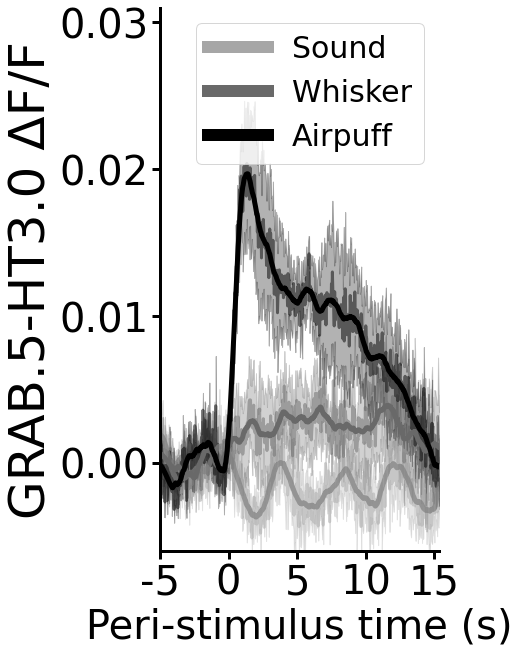

In [ ]:
#Plot whisker, airruff and sound together
plt.figure(figsize=(5,10))
PeriStim_nor = PeriStim - np.nanmean(PeriStim[:,:,:,:150],axis=(3)).reshape(3,len(animals)+1,10,1)
plt.plot(np.nanmean(PeriStim_nor[0],(0,1)),color='darkgrey',lw=3, alpha=0.5)
plt.plot(np.nanmean(PeriStim_nor[1],(0,1)),color='dimgrey',lw=3, alpha=0.5)
plt.plot(np.nanmean(PeriStim_nor[2],(0,1)),color='k',lw=3, alpha=0.5)
#Plot shaded S.E.M
plt.fill_between(np.arange(1050),np.nanmean(PeriStim_nor[0],(0,1))-np.nanstd(np.nanmean(PeriStim_nor[0],1),0)/np.sqrt(len(animals)),np.nanmean(PeriStim_nor[0],(0,1))+np.nanstd(np.nanmean(PeriStim_nor[0],1),0)/np.sqrt(len(animals)),color='darkgrey',alpha=0.3)
plt.fill_between(np.arange(1050),np.nanmean(PeriStim_nor[1],(0,1))-np.nanstd(np.nanmean(PeriStim_nor[1],1),0)/np.sqrt(len(animals)),np.nanmean(PeriStim_nor[1],(0,1))+np.nanstd(np.nanmean(PeriStim_nor[1],1),0)/np.sqrt(len(animals)),color='dimgrey',alpha=0.3)
plt.fill_between(np.arange(1050),np.nanmean(PeriStim_nor[2],(0,1))-np.nanstd(np.nanmean(PeriStim_nor[2],1),0)/np.sqrt(len(animals)),np.nanmean(PeriStim_nor[2],(0,1))+np.nanstd(np.nanmean(PeriStim_nor[2],1),0)/np.sqrt(len(animals)),color='k',alpha=0.3)
#Plot savgol filtered signal
plt.plot(signal.savgol_filter(np.nanmean(PeriStim_nor[0],(0,1)),51,3),color='grey',alpha = 0.7, lw=5, label = 'Sound')
plt.plot(signal.savgol_filter(np.nanmean(PeriStim_nor[1],(0,1)),51,3),color='dimgrey',lw=5, label = 'Whisker')
plt.plot(signal.savgol_filter(np.nanmean(PeriStim_nor[2],(0,1)),51,3),color='k',lw=5, label = 'Airpuff')
#Vertical line in 60 from min to max
#plt.plot([60,60],[np.min(np.nanmean(PeriStim_nor,(0,1))),np.max(np.nanmean(PeriStim_nor,(0,1)))],'k--',lw=3)
#Remove top and right axis
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#make axis lines and ticks thicker
ax.spines['left'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)
ax.tick_params(width=3.0,length=8.0)
#Set xticks from -2 s to 20 s, every 2 given a framerate of 30Hz
plt.xticks(np.arange(0,632,150),np.arange(-5,16,5),fontsize=40)
plt.xlim([0,610])
plt.ylim([-0.006,0.031])
plt.yticks(np.arange(0,0.031, 0.01),fontsize=40)
plt.ylabel('GRAB.5-HT3.0 ΔF/F',fontsize=50)
plt.xlabel('Peri-stimulus time (s)',fontsize=40)
leg = plt.legend(fontsize=30)
for line in leg.get_lines():
    line.set_linewidth(12.0)
plt.savefig(Save_path + 'P_7_10_AllStims.svg',bbox_inches='tight',format='svg',dpi=300)

### P11 - 14

In [ ]:
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/'
dates = ['2023-07-20']
animals = ['440','441','442','443','444']
recordings = ['t-002']
channel = 'Sound_in'
plt.figure(figsize=(20,20))
PeriStim = np.zeros((3,len(animals)+1,10,1050))
for i in range(3):
    if i == 1:
        channel = 'Whisker_in'
    elif i == 2:
        recordings = ['t-003']
    for animal in animals:
        for date in dates:
            for recording in recordings:
                grab = GRAB.GRAB_dataload(path + date + '/' + date + '_' + 'GOS' + animal + '_' +recording , detrend_both=False, detrend_CH2=False, only_CH3=False)
                paq = CaaN.paq_read_function(path + date + '/' + date + '_' + 'GOS' + animal + '_' + recording.replace('-','_') + '.paq')
                Meta = CaaN.paq_extract(paq, channel_to_Extract = channel)#'Sound_in'
                PeriStim[i,animals.index(animal),:,:] = GRAB.PeriStimFrames(grab,Meta,minus_fr=5,plus_fr=30,hz=30) # 30.49

    date = '2023-04-22'
    animal = '391'

    grab = GRAB.GRAB_dataload(path + date + '/' + date + '_' + 'GOS' + animal + '_' +recording , detrend_both=False, detrend_CH2=False, only_CH3=True)
    paq = CaaN.paq_read_function(path + date + '/' + date + '_' + 'GOS' + animal + '_' + recording.replace('-','_') + '.paq')
    Meta = CaaN.paq_extract(paq, channel_to_Extract = channel)#'Sound_in'
    PeriStim[i,-1,:,:] = GRAB.PeriStimFrames(grab,Meta,minus_fr=5,plus_fr=30,hz=30)

<Figure size 1440x1440 with 0 Axes>

C:\Users\GABRIE~1\AppData\Local\Temp/ipykernel_9604/2285870949.py:3: RuntimeWarning: Mean of empty slice
  PeriStim_nor = PeriStim - np.nanmean(PeriStim[:,:,:,:150],axis=(3)).reshape(3,len(animals)+1,10,1)


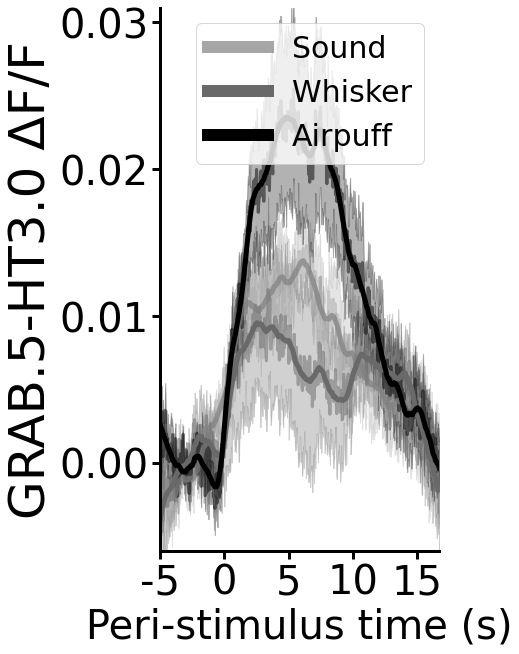

In [59]:
#Plot whisker, airruff and sound together
plt.figure(figsize=(5,10))
PeriStim_nor = PeriStim - np.nanmean(PeriStim[:,:,:,:150],axis=(3)).reshape(3,len(animals)+1,10,1)
plt.plot(np.nanmean(PeriStim_nor[0],(0,1)),color='darkgrey',lw=3, alpha=0.5)
plt.plot(np.nanmean(PeriStim_nor[1],(0,1)),color='dimgrey',lw=3, alpha=0.5)
plt.plot(np.nanmean(PeriStim_nor[2],(0,1)),color='k',lw=3, alpha=0.5)
#Plot shaded S.E.M
plt.fill_between(np.arange(1050),np.nanmean(PeriStim_nor[0],(0,1))-np.nanstd(np.nanmean(PeriStim_nor[0],1),0)/np.sqrt(len(animals)),np.nanmean(PeriStim_nor[0],(0,1))+np.nanstd(np.nanmean(PeriStim_nor[0],1),0)/np.sqrt(len(animals)),color='darkgrey',alpha=0.3)
plt.fill_between(np.arange(1050),np.nanmean(PeriStim_nor[1],(0,1))-np.nanstd(np.nanmean(PeriStim_nor[1],1),0)/np.sqrt(len(animals)),np.nanmean(PeriStim_nor[1],(0,1))+np.nanstd(np.nanmean(PeriStim_nor[1],1),0)/np.sqrt(len(animals)),color='dimgrey',alpha=0.3)
plt.fill_between(np.arange(1050),np.nanmean(PeriStim_nor[2],(0,1))-np.nanstd(np.nanmean(PeriStim_nor[2],1),0)/np.sqrt(len(animals)),np.nanmean(PeriStim_nor[2],(0,1))+np.nanstd(np.nanmean(PeriStim_nor[2],1),0)/np.sqrt(len(animals)),color='k',alpha=0.3)
#Plot savgol filtered signal
plt.plot(signal.savgol_filter(np.nanmean(PeriStim_nor[0],(0,1)),51,3),color='grey',alpha = 0.7, lw=5, label = 'Sound')
plt.plot(signal.savgol_filter(np.nanmean(PeriStim_nor[1],(0,1)),51,3),color='dimgrey',lw=5, label = 'Whisker')
plt.plot(signal.savgol_filter(np.nanmean(PeriStim_nor[2],(0,1)),51,3),color='k',lw=5, label = 'Airpuff')
#Vertical line in 60 from min to max
#plt.plot([60,60],[np.min(np.nanmean(PeriStim_nor,(0,1))),np.max(np.nanmean(PeriStim_nor,(0,1)))],'k--',lw=3)
#Remove top and right axis
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#make axis lines and ticks thicker
ax.spines['left'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)
ax.tick_params(width=3.0,length=8.0)
#Set xticks from -2 s to 20 s, every 2 given a framerate of 30Hz
plt.xticks(np.arange(0,632,150),np.arange(-5,16,5),fontsize=40)#plt.xticks(np.arange(0,510,60),np.arange(-2,15,2),fontsize=20)
plt.xlim([0,650])
plt.ylim([-0.006,0.031])
plt.yticks(np.arange(0,0.031, 0.01),fontsize=40)
plt.ylabel('GRAB.5-HT3.0 ΔF/F',fontsize=50)
plt.xlabel('Peri-stimulus time (s)',fontsize=40)
leg = plt.legend(fontsize=30)
for line in leg.get_lines():
    line.set_linewidth(12.0)
plt.savefig(Save_path + 'P_11_14_AllStims.svg',bbox_inches='tight',format='svg',dpi=300)

### >P14

In [22]:
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/'
dates = ['2023-07-29']
animals = ['440','441','442','443','444']
recordings = ['t-002']
channel = 'Sound_in'
plt.figure(figsize=(20,20))
PeriStim = np.zeros((3,len(animals)+1,10,1050))
for i in range(3):
    if i == 1:
        channel = 'Whisker_in'
    elif i == 2:
        recordings = ['t-003']
    for animal in animals:
        for date in dates:
            for recording in recordings:
                grab = GRAB.GRAB_dataload(path + date + '/' + date + '_' + 'GOS' + animal + '_' +recording , detrend_both=False, detrend_CH2=False, only_CH3=False)
                paq = CaaN.paq_read_function(path + date + '/' + date + '_' + 'GOS' + animal + '_' + recording.replace('-','_') + '.paq')
                Meta = CaaN.paq_extract(paq, channel_to_Extract = channel)#'Sound_in'
                PeriStim[i,animals.index(animal),:,:] = GRAB.PeriStimFrames(grab,Meta,minus_fr=5,plus_fr=30,hz=30) # 30.49
                #plt.plot(np.nanmean(PeriStim,0),label=animal,lw=3)
    #plt.legend(fontsize=20)
    #plt.plot([60,60],[-0.01,0.015],'k--',lw=3)
    #plt.ylabel('ΔF/F',fontsize=20)
    #plt.xlabel('# Frames (30Hz)',fontsize=20)
    #plt.ylim([-0.02,0.02])

    date = '2023-05-06'
    animal = '391'

    grab = GRAB.GRAB_dataload(path + date + '/' + date + '_' + 'GOS' + animal + '_' +recording , detrend_both=False, detrend_CH2=False, only_CH3=True)
    paq = CaaN.paq_read_function(path + date + '/' + date + '_' + 'GOS' + animal + '_' + recording.replace('-','_') + '.paq')
    Meta = CaaN.paq_extract(paq, channel_to_Extract = channel)#'Sound_in'
    PeriStim[i,-1,:,:] = GRAB.PeriStimFrames(grab,Meta,minus_fr=5,plus_fr=30,hz=30)

<Figure size 2000x2000 with 0 Axes>

C:\Users\GABRIE~1\AppData\Local\Temp/ipykernel_9604/3742428324.py:3: RuntimeWarning: Mean of empty slice
  PeriStim_nor = PeriStim - np.nanmean(PeriStim[:,:,:,:150],axis=(3)).reshape(3,len(animals)+1,10,1)


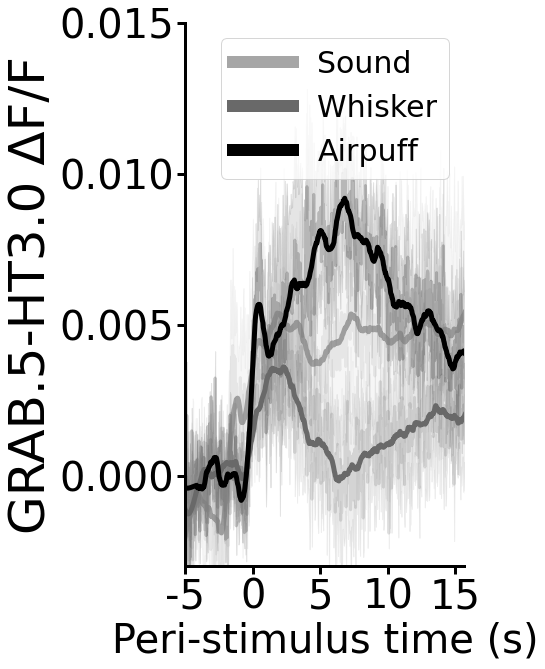

In [73]:
#Plot whisker, airruff and sound together
plt.figure(figsize=(5,10))
PeriStim_nor = PeriStim - np.nanmean(PeriStim[:,:,:,:150],axis=(3)).reshape(3,len(animals)+1,10,1)
plt.plot(np.nanmean(PeriStim_nor[0],(0,1)),color='darkgrey',lw=3, alpha=0.2)
plt.plot(np.nanmean(PeriStim_nor[1],(0,1)),color='dimgrey',lw=3, alpha=0.2)
plt.plot(np.nanmean(PeriStim_nor[2],(0,1)),color='k',lw=3, alpha=0.2)
#Plot shaded S.E.M
plt.fill_between(np.arange(1050),np.nanmean(PeriStim_nor[0],(0,1))-np.nanstd(np.nanmean(PeriStim_nor[0],1),0)/np.sqrt(len(animals)),np.nanmean(PeriStim_nor[0],(0,1))+np.nanstd(np.nanmean(PeriStim_nor[0],1),0)/np.sqrt(len(animals)),color='darkgrey',alpha=0.1)
plt.fill_between(np.arange(1050),np.nanmean(PeriStim_nor[1],(0,1))-np.nanstd(np.nanmean(PeriStim_nor[1],1),0)/np.sqrt(len(animals)),np.nanmean(PeriStim_nor[1],(0,1))+np.nanstd(np.nanmean(PeriStim_nor[1],1),0)/np.sqrt(len(animals)),color='dimgrey',alpha=0.1)
plt.fill_between(np.arange(1050),np.nanmean(PeriStim_nor[2],(0,1))-np.nanstd(np.nanmean(PeriStim_nor[2],1),0)/np.sqrt(len(animals)),np.nanmean(PeriStim_nor[2],(0,1))+np.nanstd(np.nanmean(PeriStim_nor[2],1),0)/np.sqrt(len(animals)),color='k',alpha=0.1)
#Plot savgol filtered signal
plt.plot(signal.savgol_filter(np.nanmean(PeriStim_nor[0],(0,1)),51,3),color='grey',alpha = 0.7, lw=5, label = 'Sound')
plt.plot(signal.savgol_filter(np.nanmean(PeriStim_nor[1],(0,1)),51,3),color='dimgrey',lw=5, label = 'Whisker')
plt.plot(signal.savgol_filter(np.nanmean(PeriStim_nor[2],(0,1)),51,3),color='k',lw=5, label = 'Airpuff')
#Vertical line in 60 from min to max
#plt.plot([60,60],[np.min(np.nanmean(PeriStim_nor,(0,1))),np.max(np.nanmean(PeriStim_nor,(0,1)))],'k--',lw=3)
#Remove top and right axis
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#make axis lines and ticks thicker
ax.spines['left'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)
ax.tick_params(width=3.0,length=8.0)
#Set xticks from -2 s to 20 s, every 2 given a framerate of 30Hz
plt.xticks(np.arange(0,632,150),np.arange(-5,16,5),fontsize=40)#plt.xticks(np.arange(0,510,60),np.arange(-2,15,2),fontsize=20)
plt.xlim([0,620])
plt.ylim([-0.003,0.015])
plt.yticks(np.arange(0,0.016, 0.005),fontsize=40)
plt.ylabel('GRAB.5-HT3.0 ΔF/F',fontsize=50)
plt.xlabel('Peri-stimulus time (s)',fontsize=40)
leg = plt.legend(fontsize=30)
for line in leg.get_lines():
    line.set_linewidth(12.0)
plt.savefig(Save_path + 'P_15_17_AllStims.svg',bbox_inches='tight',format='svg',dpi=300)

# Peri-cell analysis VIP(+/-)/NKX2.1(+/-)

### Sensory responses

In [279]:
#Load csv with interneurons indexes
File_name = '2023_10_20_df_GRAB'
Load_path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Analysis/Data_frames/'
#Save_path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Analysis/Paper_figures/Figure_1/Plots/' 


#Load data
df = pd.read_csv(Load_path + File_name + '.csv')

In [287]:
df_dev = df[df['Age']<11]
recordings = ['t-002','t-003']
VIP_PeriStim = np.empty((0,3,10,1050))
NKX_PeriStim = np.empty((0,3,10,1050))
NON_PeriStim = np.empty((0,3,10,1050))
region_resp = np.zeros((256,3,10,1050))
region_resp[region_resp == 0] = np.nan

for i,row in df_dev.iterrows():
    count = 0
    for recording in recordings:
        path_data = row['filepath'][:-4] + recording + '/'
        path_ter = '_regions_unreg.csv'
        grab = GRAB.GRAB_regions_dataload(path_data, Path_ter ='_regions_unreg.csv',num_regions=256,only_CH3=False,detrend_CH2=False,detrend_both=False) # Early on no hemodynamic response, and loading only CH3 cuts loading time by 50%
        paq = CaaN.paq_read_function(row['filepath'][:-4] + recording.replace('-','_') + '.paq')
        if recording == 't-002':
            channel = 'Sound_in'
            meta = CaaN.paq_extract(paq, channel_to_Extract = channel)#'Sound_in'
            region_resp[:,count,:,:] = GRAB.PeriStimFrames(grab,meta, regions = True, minus_fr=5,plus_fr=30,hz=30)
            count += 1
        channel = 'Whisker_in'
        meta = CaaN.paq_extract(paq, channel_to_Extract = channel)#'Sound_in'
        region_resp[:,count,:,:] = GRAB.PeriStimFrames(grab,meta, regions = True, minus_fr=5,plus_fr=30,hz=30) # 30.49
        count += 1

    #Select interneuron indexes   
    interneuron = (row.iloc[4:-1].values).astype(float)
    interneuron = (interneuron[~np.isnan(interneuron)]).astype(int) # Remove nans and convert to int
    non = np.setdiff1d(np.arange(256),interneuron) #Select from 0 to 256 all other numbers not included in vips
          
    NON_PeriStim = np.append(NON_PeriStim,region_resp[non,:,:,:],axis=0)
    if row['Interneuron'] == 'Vip':
        VIP_PeriStim = np.append(VIP_PeriStim,region_resp[interneuron,:,:,:],axis=0)
    elif row['Interneuron'] == 'Nkx2.1':
        NKX_PeriStim = np.append(NKX_PeriStim,region_resp[interneuron,:,:,:],axis=0)



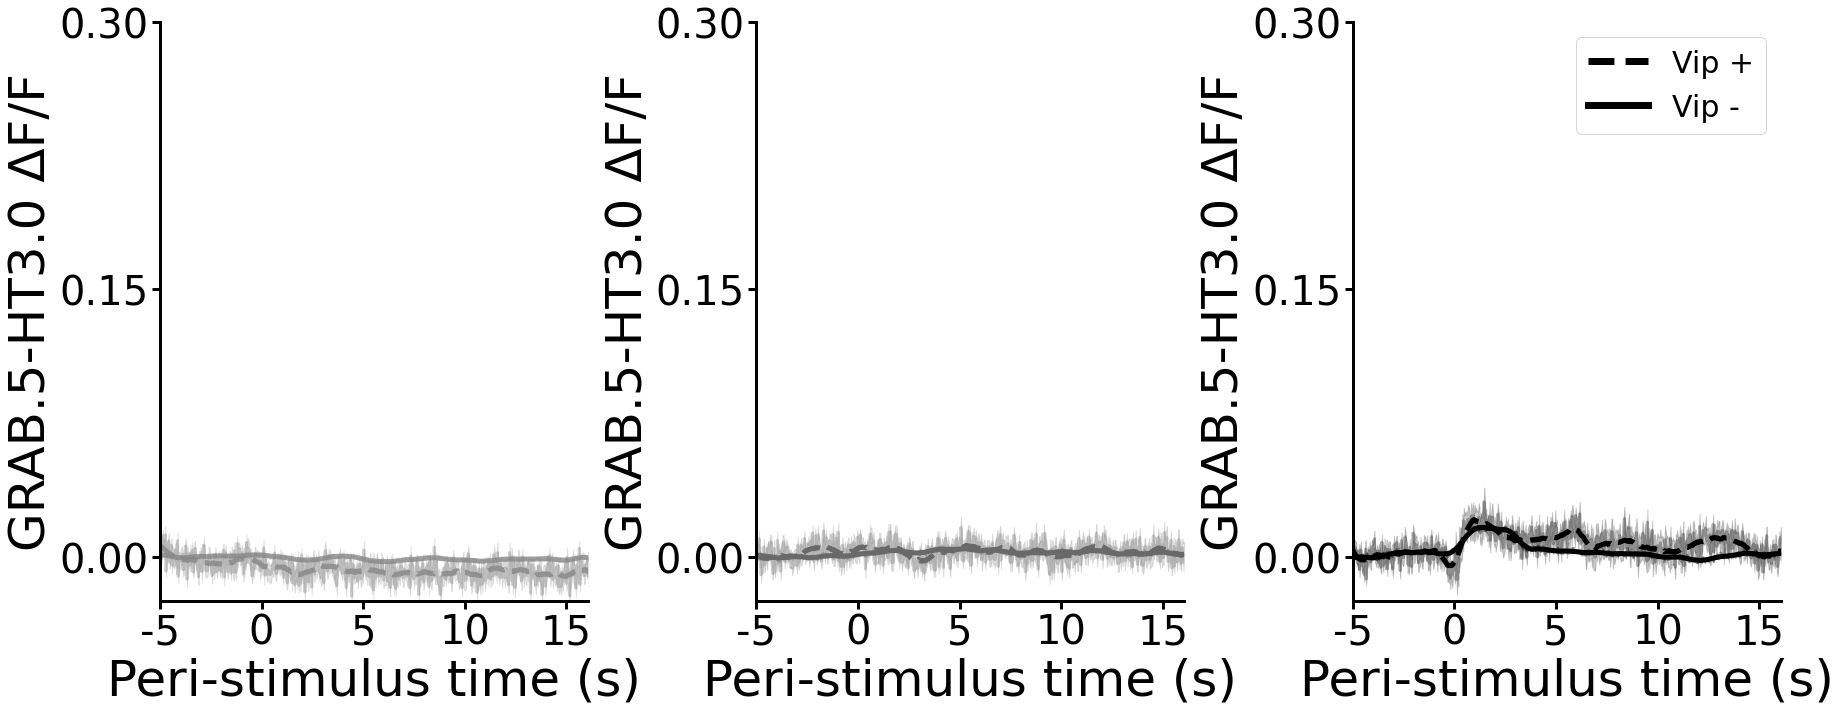

In [282]:
# Plot mean responses of VIPs, NKX and non interneurons
plt.figure(figsize=(25,10))
colors = ['darkgray','darkred','darkcyan']
for i in range(3):
    plt.subplot(1,3,i+1)
    if i == 0:
        #VIP
        baseline = np.nanmean(VIP_PeriStim[:,i,:,:60],2)
        plt.plot(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),color = 'dimgray',lw=3,alpha=0.3)
        #Plot savgol filtered signal
        sg = signal.savgol_filter(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),51,3)
        plt.plot(sg,color = 'grey',lw=5,label='Vip +', linestyle='--', alpha = 0.7)
        #Shaded SEM of axis 0
        plt.fill_between(np.arange(1050),np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))-np.nanstd(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(VIP_PeriStim)),np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))+np.nanstd(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(VIP_PeriStim)),color = 'grey',alpha=0.2)
        #non
        baseline = np.nanmean(NON_PeriStim[:,i,:,:60],2)
        plt.plot(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),color='lightgrey',lw=3,alpha=0.3)
        #Plot savgol filtered signal
        sg = signal.savgol_filter(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),51,3)
        plt.plot(sg,color='grey',lw=5,label='Vip -', linestyle='-',alpha = 0.7)
        #Shaded SEM of axis 0
        plt.fill_between(np.arange(1050),np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))-np.nanstd(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(NON_PeriStim)),np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))+np.nanstd(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(NON_PeriStim)),color='grey',alpha=0.2)
        #Remove top and right axis
    if i == 1:
        #VIP
        baseline = np.nanmean(VIP_PeriStim[:,i,:,:60],2)
        plt.plot(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),color = 'dimgrey',lw=3,alpha=0.3)
        #Plot savgol filtered signal
        sg = signal.savgol_filter(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),51,3)
        plt.plot(sg,color = 'dimgrey',lw=5,label='Vip +', linestyle='--')
        #Shaded SEM of axis 0
        plt.fill_between(np.arange(1050),np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))-np.nanstd(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(VIP_PeriStim)),np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))+np.nanstd(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(VIP_PeriStim)),color = 'dimgrey',alpha=0.2)
        #non
        baseline = np.nanmean(NON_PeriStim[:,i,:,:60],2)
        plt.plot(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),color='dimgrey',lw=3,alpha=0.3)
        #Plot savgol filtered signal
        sg = signal.savgol_filter(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),51,3)
        plt.plot(sg,color='dimgrey',lw=5,label='Vip -', linestyle='-')
        #Shaded SEM of axis 0
        plt.fill_between(np.arange(1050),np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))-np.nanstd(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(NON_PeriStim)),np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))+np.nanstd(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(NON_PeriStim)),color='dimgrey',alpha=0.2)
        #Remove top and right axis
    if i == 2:
        #VIP
        baseline = np.nanmean(VIP_PeriStim[:,i,:,:60],2)
        plt.plot(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),color = 'k',lw=3,alpha=0.3)
        #Plot savgol filtered signal
        sg = signal.savgol_filter(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),51,3)
        plt.plot(sg,color = 'k',lw=5,label='Vip +', linestyle='--')
        #Shaded SEM of axis 0
        plt.fill_between(np.arange(1050),np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))-np.nanstd(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(VIP_PeriStim)),np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))+np.nanstd(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(VIP_PeriStim)),color = 'k',alpha=0.2)
        #non
        baseline = np.nanmean(NON_PeriStim[:,i,:,:60],2)
        plt.plot(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),color='k',lw=3,alpha=0.3)
        #Plot savgol filtered signal
        sg = signal.savgol_filter(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),51,3)
        plt.plot(sg,color='k',lw=5,label='Vip -', linestyle='-')
        #Shaded SEM of axis 0
        plt.fill_between(np.arange(1050),np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))-np.nanstd(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(NON_PeriStim)),np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))+np.nanstd(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(NON_PeriStim)),color='k',alpha=0.2)
        #Remove top and right axis

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #make axis lines and ticks thicker
    ax.spines['left'].set_linewidth(3.0)
    ax.spines['bottom'].set_linewidth(3.0)
    ax.tick_params(width=3.0,length=8.0)
    #plt.ylim([-0.003,0.007])
    plt.yticks(np.arange(-0.01,0.031,0.015), fontsize=40)
    plt.ylabel('GRAB.5-HT3.0 ΔF/F',fontsize=50)
    plt.xlabel('Peri-stimulus time (s)',fontsize=50)
    if i == 2:
        leg = plt.legend(fontsize=30)
        for line in leg.get_lines():
            line.set_linewidth(7.0)
    #plt.ylim([-0.08,0.04])
    #Set xticks from -2 s to 20 s, every 2 given a framerate of 30Hz
    plt.xticks(np.arange(0,632,150),np.arange(-5,16,5),fontsize=40)
    plt.xlim([0,632])
    plt.ylim([-0.025,0.3])
    plt.yticks(np.arange(0.0,0.31,0.15), fontsize=40)
plt.tight_layout()
plt.savefig(Save_path + 'P7-10_Interneurons_GRAB_No_Nkx_same_axis.svg',bbox_inches='tight',format='svg',dpi=300)


In [283]:
df_dev = df[df['Age']>10]
df_dev = df_dev[df_dev['Age']<15]
recordings = ['t-002','t-003']
VIP_PeriStim = np.empty((0,3,10,1050))
NKX_PeriStim = np.empty((0,3,10,1050))
NON_PeriStim = np.empty((0,3,10,1050))
region_resp = np.zeros((256,3,10,1050))
region_resp[region_resp == 0] = np.nan

for i,row in df_dev.iterrows():
    count = 0
    for recording in recordings:
        path_data = row['filepath'][:-4] + recording + '/'
        path_ter = '_regions_unreg.csv'
        grab = GRAB.GRAB_regions_dataload(path_data, Path_ter ='_regions_unreg.csv',num_regions=256,only_CH3=True,detrend_CH2=False,detrend_both=False) # Early on no hemodynamic response, and loading only CH3 cuts loading time by 50%
        paq = CaaN.paq_read_function(row['filepath'][:-4] + recording.replace('-','_') + '.paq')
        if recording == 't-002':
            channel = 'Sound_in'
            meta = CaaN.paq_extract(paq, channel_to_Extract = channel)#'Sound_in'
            region_resp[:,count,:,:] = GRAB.PeriStimFrames(grab,meta, regions = True, minus_fr=5,plus_fr=30,hz=30)
            count += 1
        channel = 'Whisker_in'
        meta = CaaN.paq_extract(paq, channel_to_Extract = channel)#'Sound_in'
        region_resp[:,count,:,:] = GRAB.PeriStimFrames(grab,meta, regions = True, minus_fr=5,plus_fr=30,hz=30) # 30.49
        count += 1

    #Select interneuron indexes   
    interneuron = (row.iloc[4:-1].values).astype(float)
    interneuron = (interneuron[~np.isnan(interneuron)]).astype(int) # Remove nans and convert to int
    non = np.setdiff1d(np.arange(256),interneuron) #Select from 0 to 256 all other numbers not included in vips
          
    NON_PeriStim = np.append(NON_PeriStim,region_resp[non,:,:,:],axis=0)
    if row['Interneuron'] == 'Vip':
        VIP_PeriStim = np.append(VIP_PeriStim,region_resp[interneuron,:,:,:],axis=0)
    elif row['Interneuron'] == 'Nkx2.1':
        NKX_PeriStim = np.append(NKX_PeriStim,region_resp[interneuron,:,:,:],axis=0)



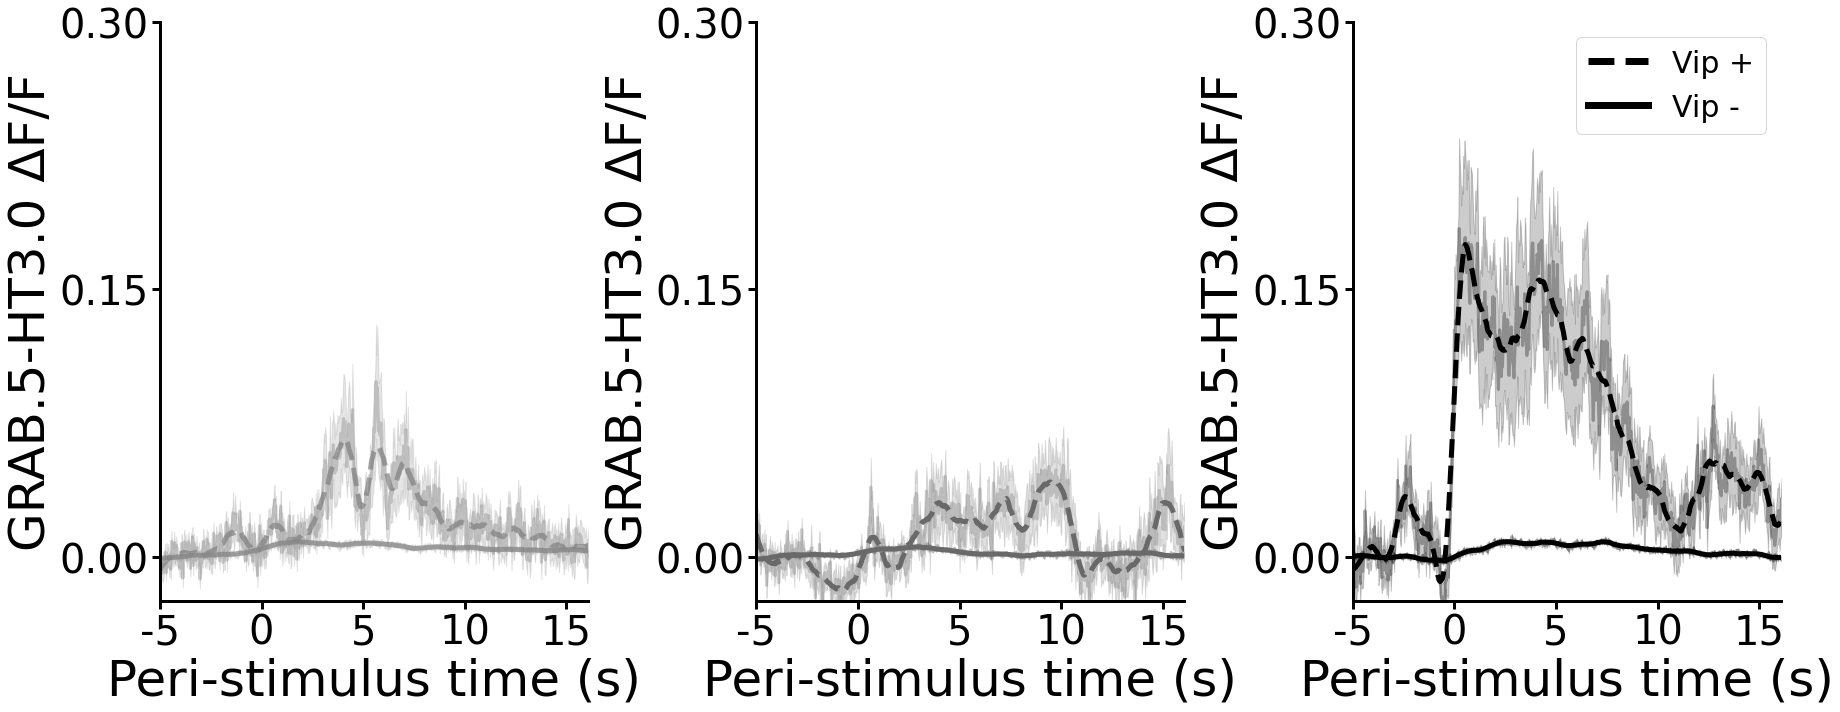

In [645]:
# Plot mean responses of VIPs, NKX and non interneurons
plt.figure(figsize=(25,10))
colors = ['darkgray','darkred','darkcyan']
for i in range(3):
    plt.subplot(1,3,i+1)
    if i == 0:
        #VIP
        baseline = np.nanmean(VIP_PeriStim[:,i,:,:60],2)
        plt.plot(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),color = 'dimgray',lw=3,alpha=0.3)
        #Plot savgol filtered signal
        sg = signal.savgol_filter(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),51,3)
        plt.plot(sg,color = 'grey',lw=5,label='Vip +', linestyle='--', alpha = 0.7)
        #Shaded SEM of axis 0
        plt.fill_between(np.arange(1050),np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))-np.nanstd(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(VIP_PeriStim)),np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))+np.nanstd(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(VIP_PeriStim)),color = 'grey',alpha=0.2)
        #non
        baseline = np.nanmean(NON_PeriStim[:,i,:,:60],2)
        plt.plot(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),color='lightgrey',lw=3,alpha=0.3)
        #Plot savgol filtered signal
        sg = signal.savgol_filter(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),51,3)
        plt.plot(sg,color='grey',lw=5,label='Vip -', linestyle='-',alpha = 0.7)
        #Shaded SEM of axis 0
        plt.fill_between(np.arange(1050),np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))-np.nanstd(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(NON_PeriStim)),np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))+np.nanstd(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(NON_PeriStim)),color='grey',alpha=0.2)
        #Remove top and right axis
    if i == 1:
        #VIP
        baseline = np.nanmean(VIP_PeriStim[:,i,:,:60],2)
        plt.plot(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),color = 'dimgrey',lw=3,alpha=0.3)
        #Plot savgol filtered signal
        sg = signal.savgol_filter(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),51,3)
        plt.plot(sg,color = 'dimgrey',lw=5,label='Vip +', linestyle='--')
        #Shaded SEM of axis 0
        plt.fill_between(np.arange(1050),np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))-np.nanstd(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(VIP_PeriStim)),np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))+np.nanstd(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(VIP_PeriStim)),color = 'dimgrey',alpha=0.2)
        #non
        baseline = np.nanmean(NON_PeriStim[:,i,:,:60],2)
        plt.plot(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),color='dimgrey',lw=3,alpha=0.3)
        #Plot savgol filtered signal
        sg = signal.savgol_filter(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),51,3)
        plt.plot(sg,color='dimgrey',lw=5,label='Vip -', linestyle='-')
        #Shaded SEM of axis 0
        plt.fill_between(np.arange(1050),np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))-np.nanstd(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(NON_PeriStim)),np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))+np.nanstd(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(NON_PeriStim)),color='dimgrey',alpha=0.2)
        #Remove top and right axis
    if i == 2:
        #VIP
        baseline = np.nanmean(VIP_PeriStim[:,i,:,:60],2)
        plt.plot(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),color = 'k',lw=3,alpha=0.3)
        #Plot savgol filtered signal
        sg = signal.savgol_filter(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),51,3)
        plt.plot(sg,color = 'k',lw=5,label='Vip +', linestyle='--')
        #Shaded SEM of axis 0
        plt.fill_between(np.arange(1050),np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))-np.nanstd(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(VIP_PeriStim)),np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))+np.nanstd(np.nanmean(VIP_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(VIP_PeriStim)),color = 'k',alpha=0.2)
        #non
        baseline = np.nanmean(NON_PeriStim[:,i,:,:60],2)
        plt.plot(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),color='k',lw=3,alpha=0.3)
        #Plot savgol filtered signal
        sg = signal.savgol_filter(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1)),51,3)
        plt.plot(sg,color='k',lw=5,label='Vip -', linestyle='-')
        #Shaded SEM of axis 0
        plt.fill_between(np.arange(1050),np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))-np.nanstd(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(NON_PeriStim)),np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],(0,1))+np.nanstd(np.nanmean(NON_PeriStim[:,i,:,:]-baseline[:,:,np.newaxis],1),0)/np.sqrt(len(NON_PeriStim)),color='k',alpha=0.2)
        #Remove top and right axis

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #make axis lines and ticks thicker
    ax.spines['left'].set_linewidth(3.0)
    ax.spines['bottom'].set_linewidth(3.0)
    ax.tick_params(width=3.0,length=8.0)
    #plt.ylim([-0.003,0.007])
    plt.yticks(np.arange(0.0,0.31,0.15), fontsize=40)
    plt.ylabel('GRAB.5-HT3.0 ΔF/F',fontsize=50)
    plt.xlabel('Peri-stimulus time (s)',fontsize=50)
    if i == 2:
        leg = plt.legend(fontsize=30)
        for line in leg.get_lines():
            line.set_linewidth(7.0)
    #plt.ylim([-0.08,0.04])
    #Set xticks from -2 s to 20 s, every 2 given a framerate of 30Hz
    plt.xticks(np.arange(0,632,150),np.arange(-5,16,5),fontsize=40)
    plt.xlim([0,632])
    plt.ylim([-0.025,0.3])
plt.tight_layout()
plt.savefig(Save_path + 'P11-13_Interneurons_GRAB_No_Nkx.svg',bbox_inches='tight',format='svg',dpi=300)


### Image/heat maps

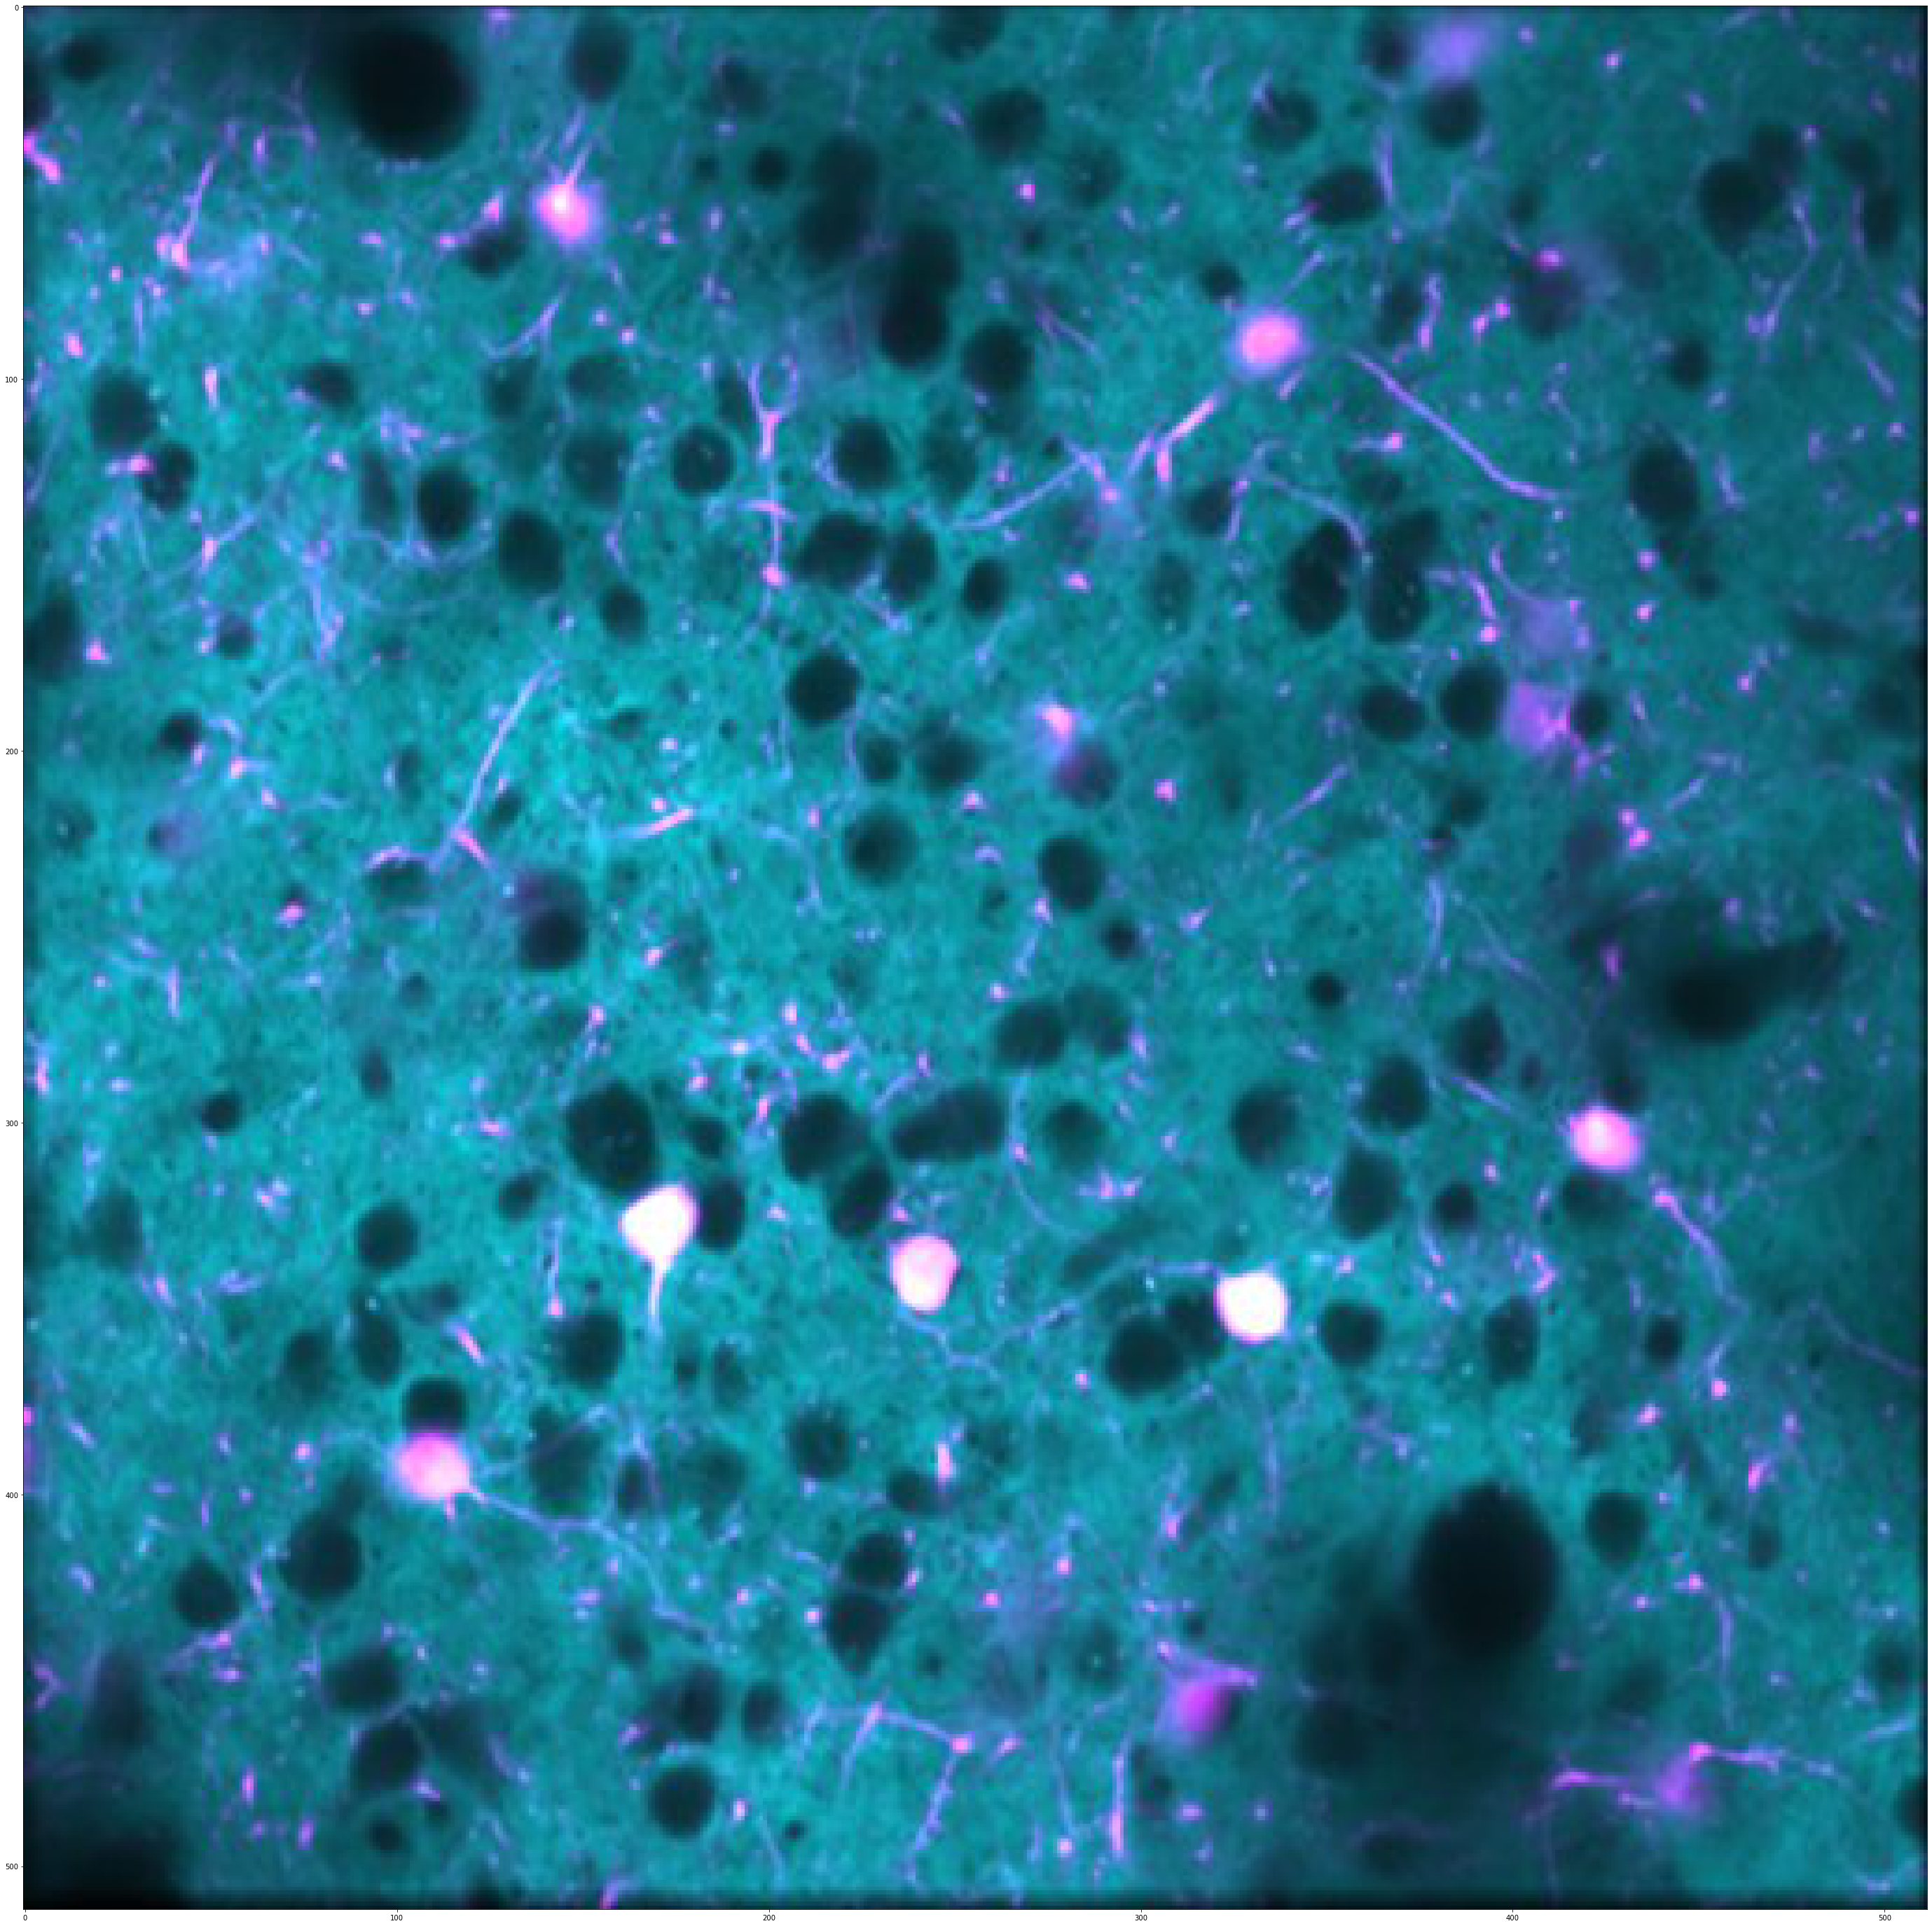

In [ ]:
#Load composite.jpeg from path
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-29/2023-07-29_GOS441_t-002/Composite.jpg'
img = plt.imread(path)
#copy image
imgt =  img.copy()
imgt[:,:,0] = img[:,:,0].T
imgt[:,:,1] = img[:,:,1].T
imgt[:,:,2] = img[:,:,2].T

#Plot the image
plt.figure(figsize=(50,50))
plt.imshow(imgt)
#Save figure in same folder
plt.savefig(Save_path + 'Composite_transposed.jpg',dpi=300,format='jpg',bbox_inches='tight')

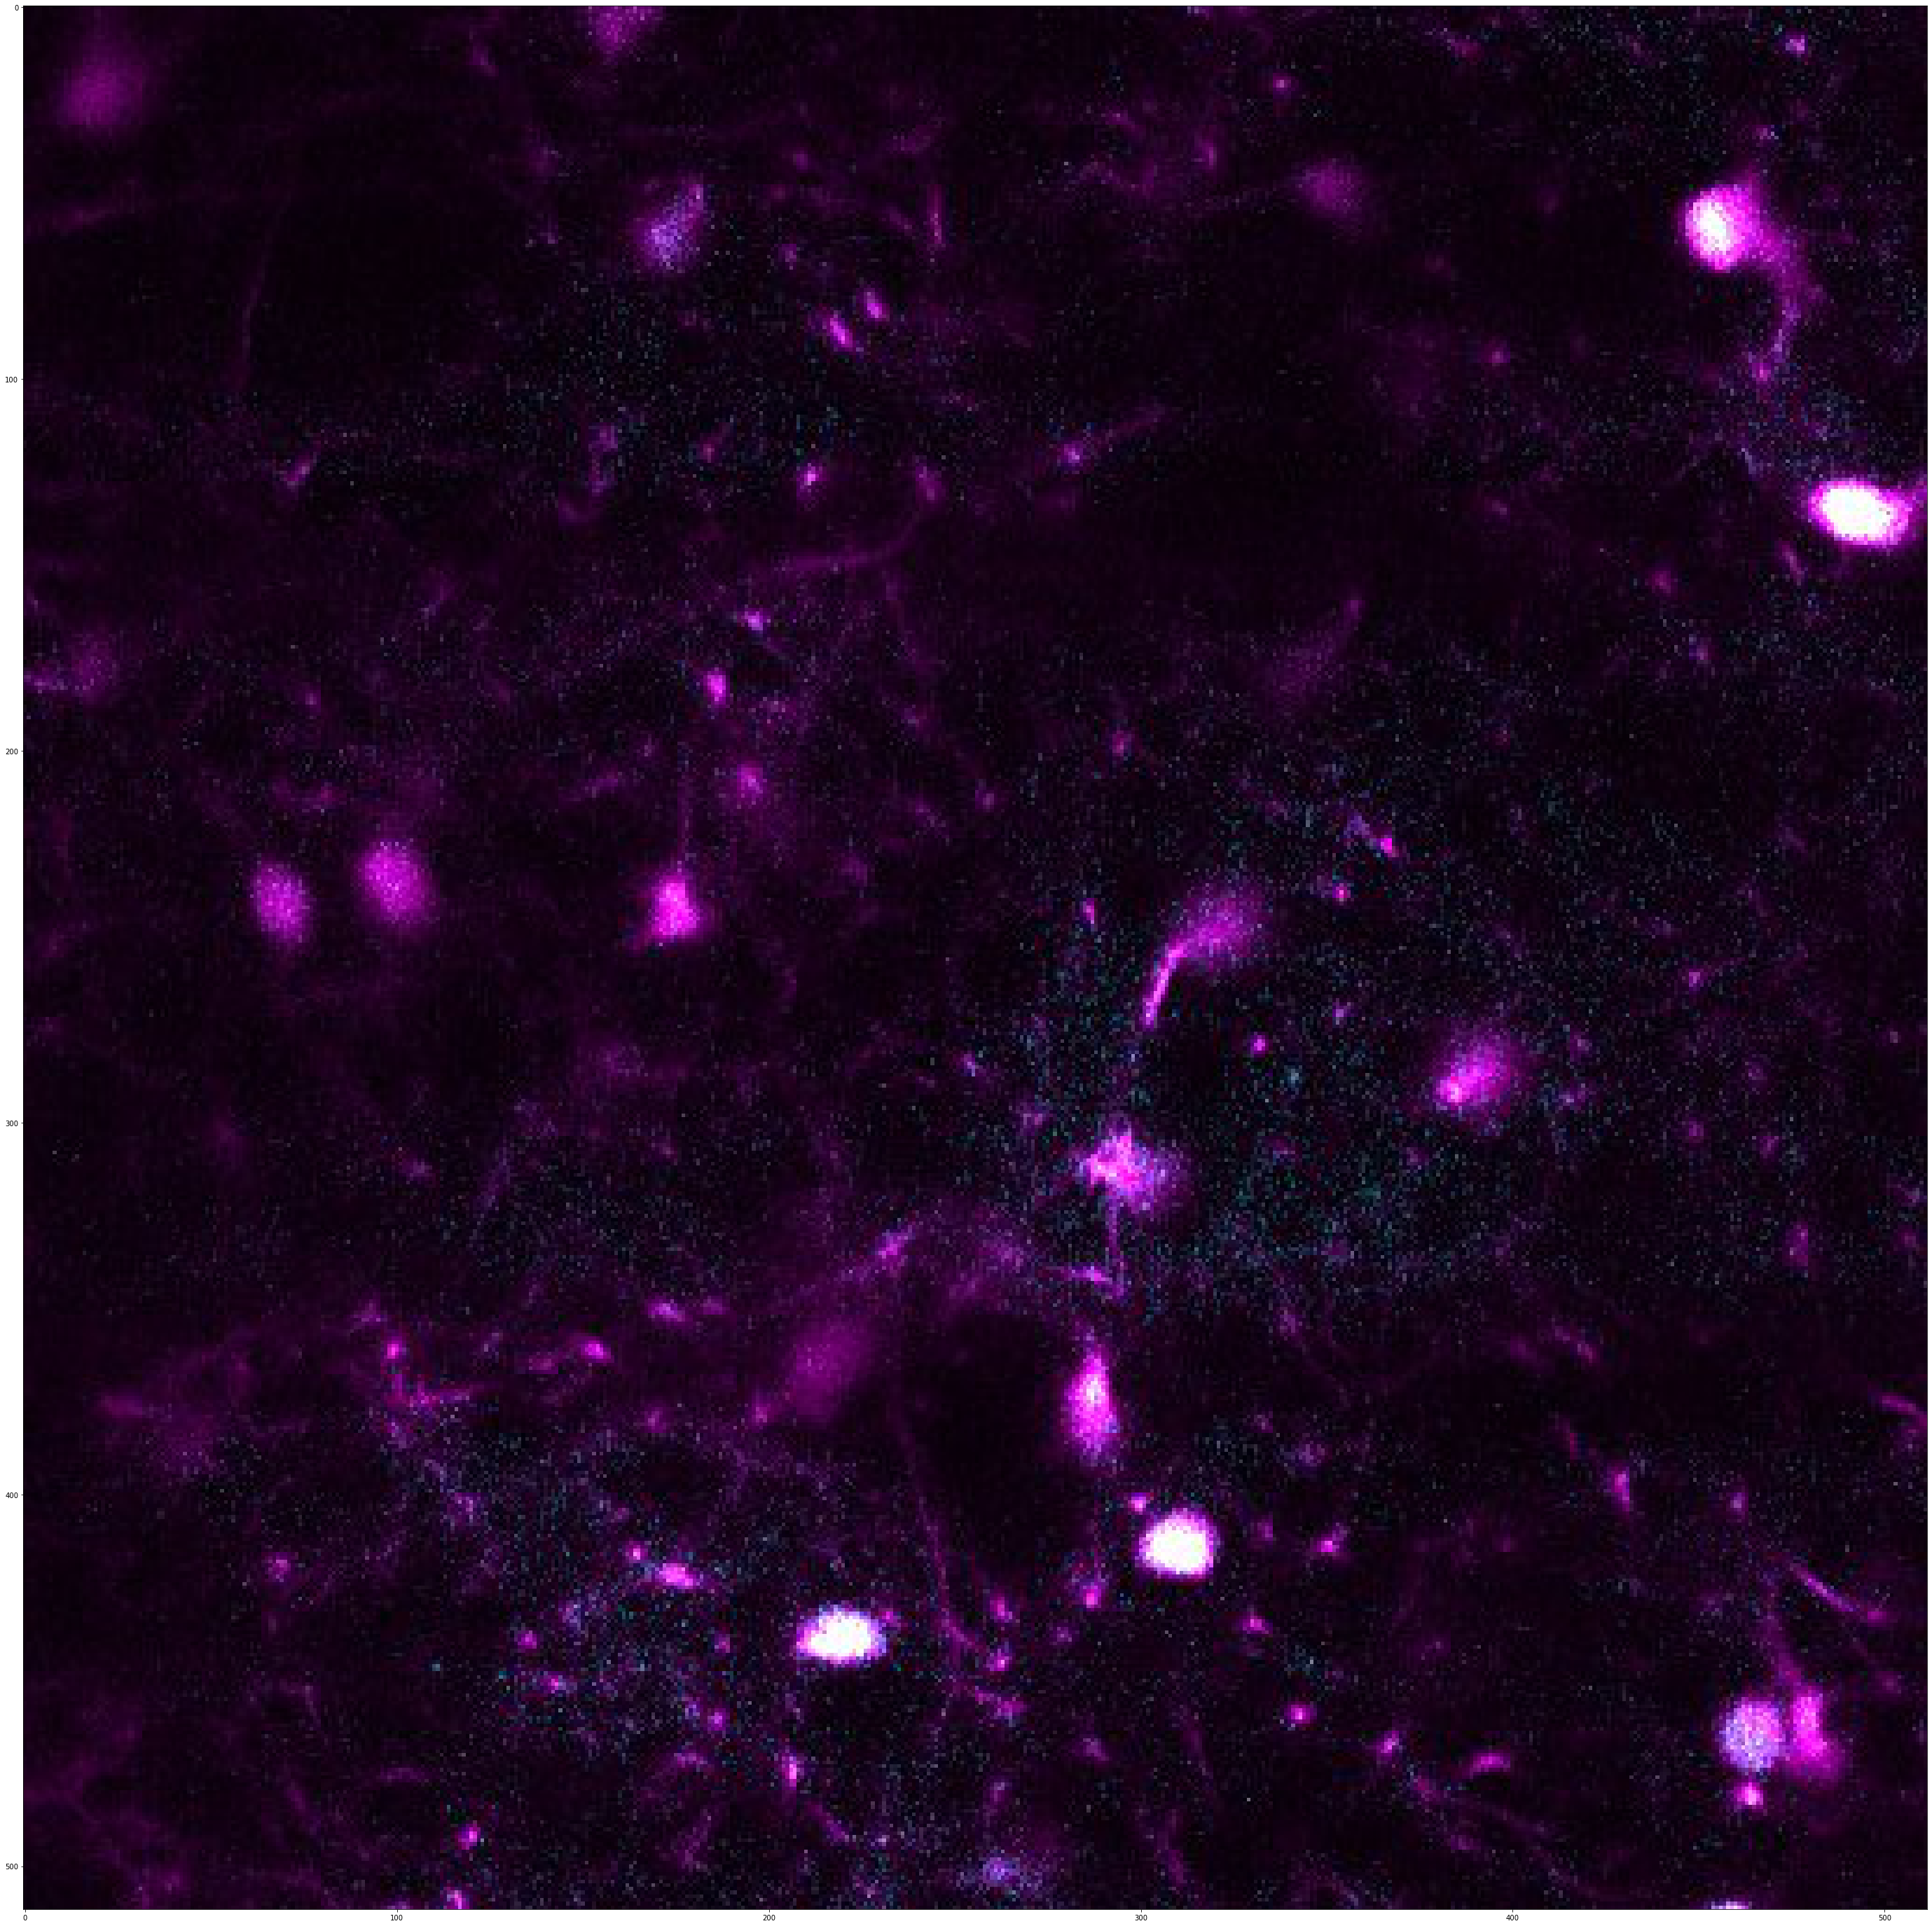

In [656]:
#Load composite.jpeg from path
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-17/2023-07-17_GOS441_t-003/Composite.jpg'
img = plt.imread(path)
#copy image
imgt =  img.copy()
imgt[:,:,0] = img[:,:,0].T
imgt[:,:,1] = img[:,:,1].T
imgt[:,:,2] = img[:,:,2].T

#Plot the image
plt.figure(figsize=(50,50))
plt.imshow(imgt)
#Save figure in same folder
plt.savefig(Save_path + 'Composite_transposed_P7-10_VIP.jpg',dpi=300,format='jpg',bbox_inches='tight')

In [657]:
recording = 't-003'
path_ter = '_regions_unreg.csv'
path_data = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-17/2023-07-17_GOS441_t-003/'
path_paq = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-17/2023-07-17_GOS441_t_003.paq'
grab = GRAB.GRAB_regions_dataload(path_data, Path_ter ='_regions_reg.csv',num_regions=256,only_CH3=True,detrend_CH2=False,detrend_both=False) # Early on no hemodynamic response, and loading only CH3 cuts loading time by 50%
paq = CaaN.paq_read_function(path_paq)
channel = 'Whisker_in'
meta = CaaN.paq_extract(paq, channel_to_Extract = channel)#'Sound_in'
periS= GRAB.PeriStimFrames(grab,meta, regions = True, minus_fr=5,plus_fr=30,hz=30)


In [658]:
b = np.nanmean(periS,1)
b.shape

(256, 1050)

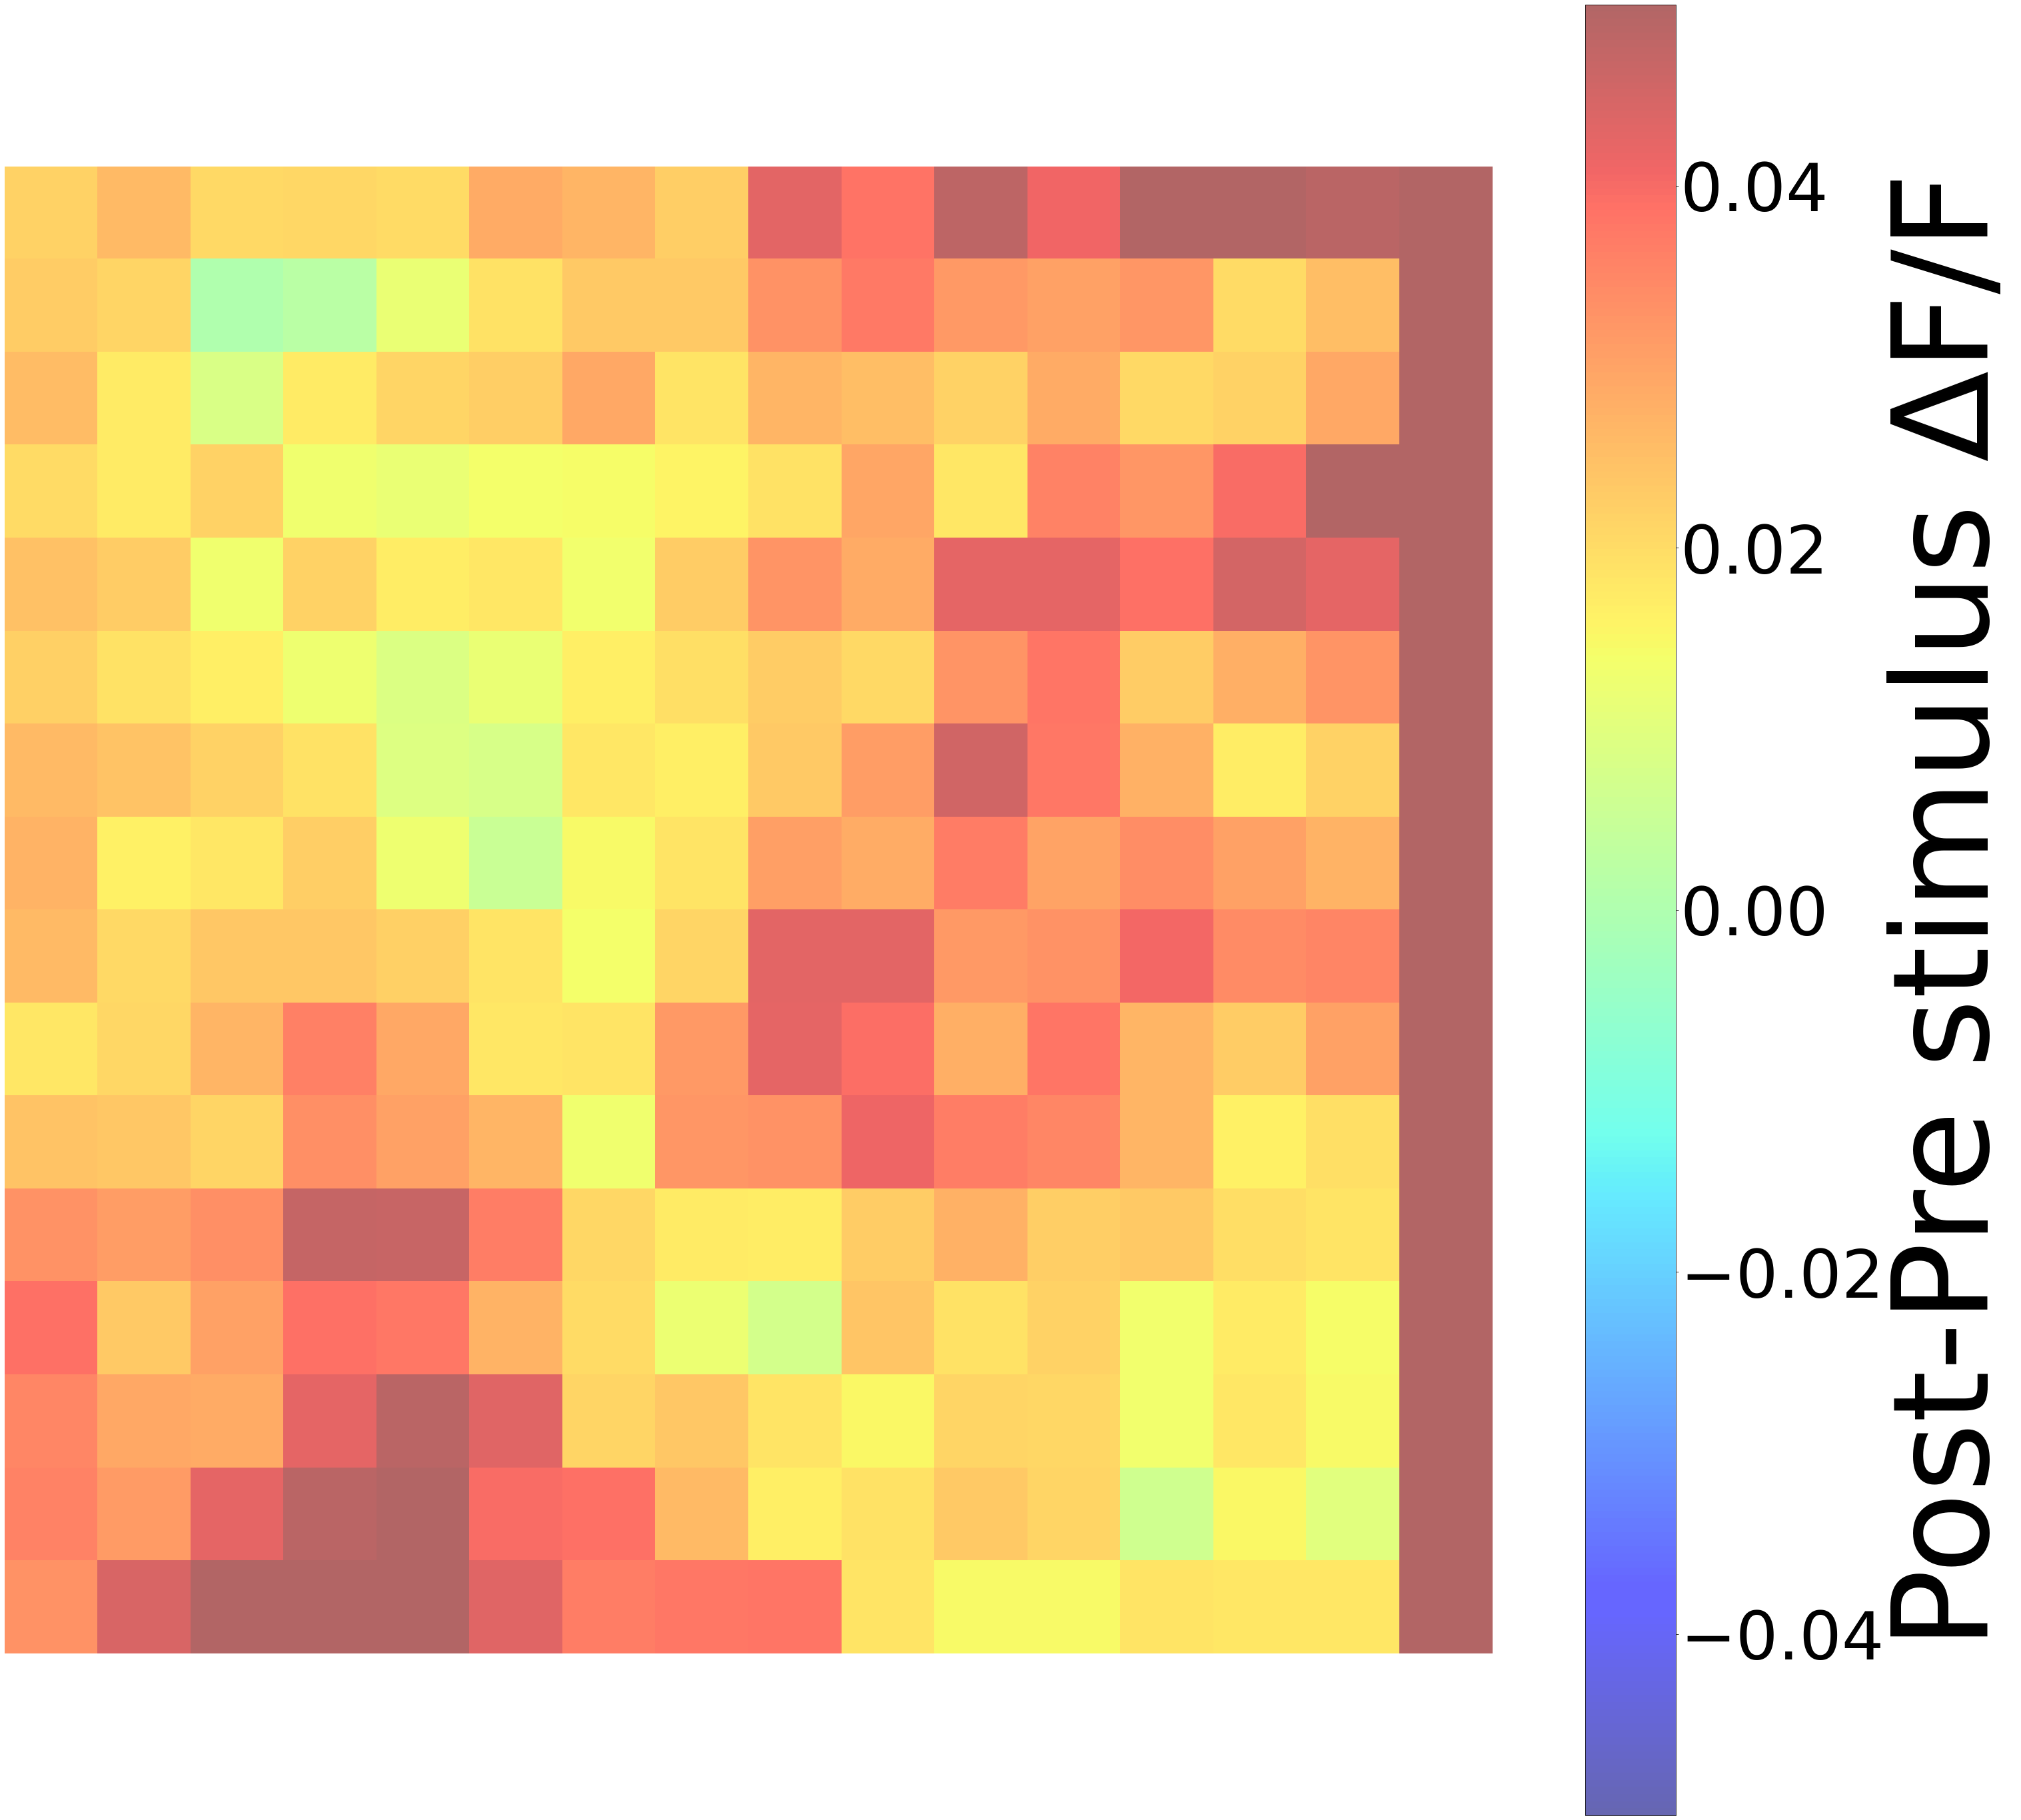

In [684]:
plt.figure(figsize=(50,50))
plt.imshow(np.reshape(np.mean(b[:,150:300],1)-np.mean(b[:,:150],1),(16,16)),cmap='jet',alpha=0.6, vmin = -0.05, vmax = 0.05)
#colorbar with settingsa
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=100)
cbar.set_label('Post-Pre stimulus ΔF/F',size=200)
#axis off
plt.axis('off')
plt.savefig(Save_path + 'color_map_vip_P7-10.svg',dpi=300,format='svg',bbox_inches='tight')

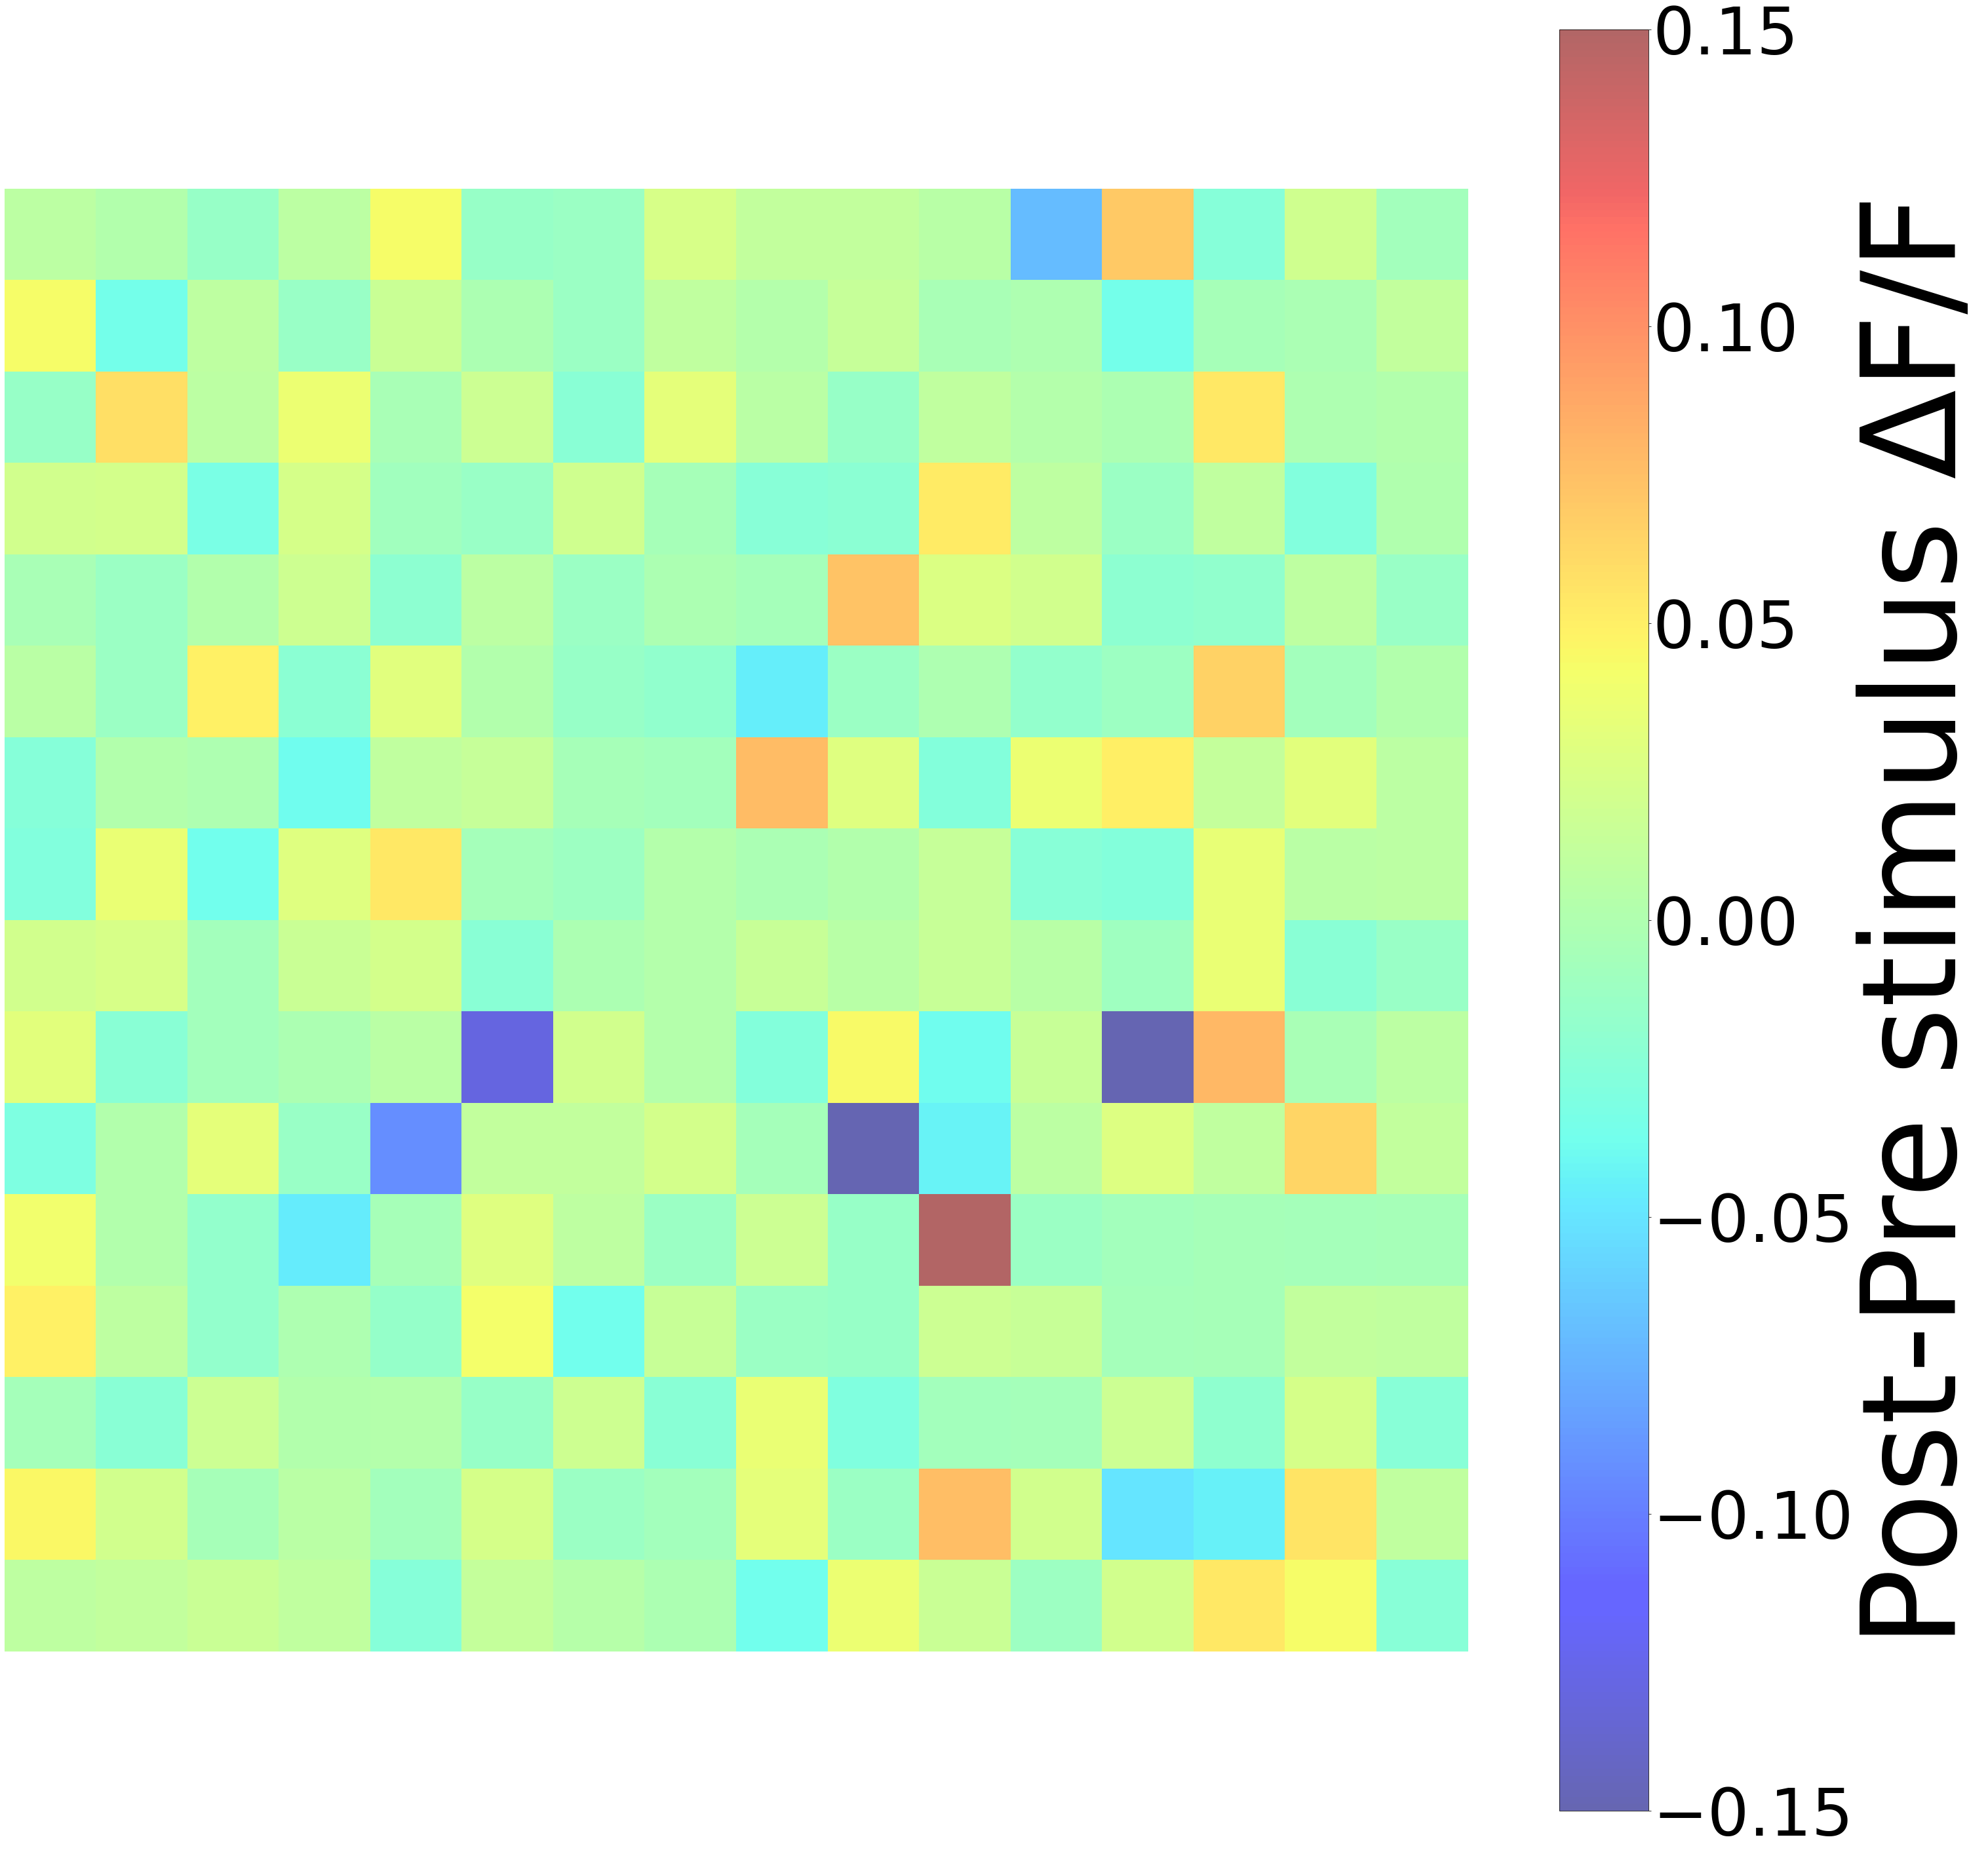

In [386]:
plt.figure(figsize=(50,50))
plt.imshow(np.reshape(np.mean(b[:,150:300],1)-np.mean(b[:,:150],1),(16,16)),cmap='jet',alpha=0.6, vmin = -0.15, vmax = 0.15)
#colorbar with settingsa
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=100)
cbar.set_label('Post-Pre stimulus ΔF/F',size=200)
#axis off
plt.axis('off')
plt.savefig(Save_path + 'color_map_vip.svg',dpi=300,format='svg',bbox_inches='tight')

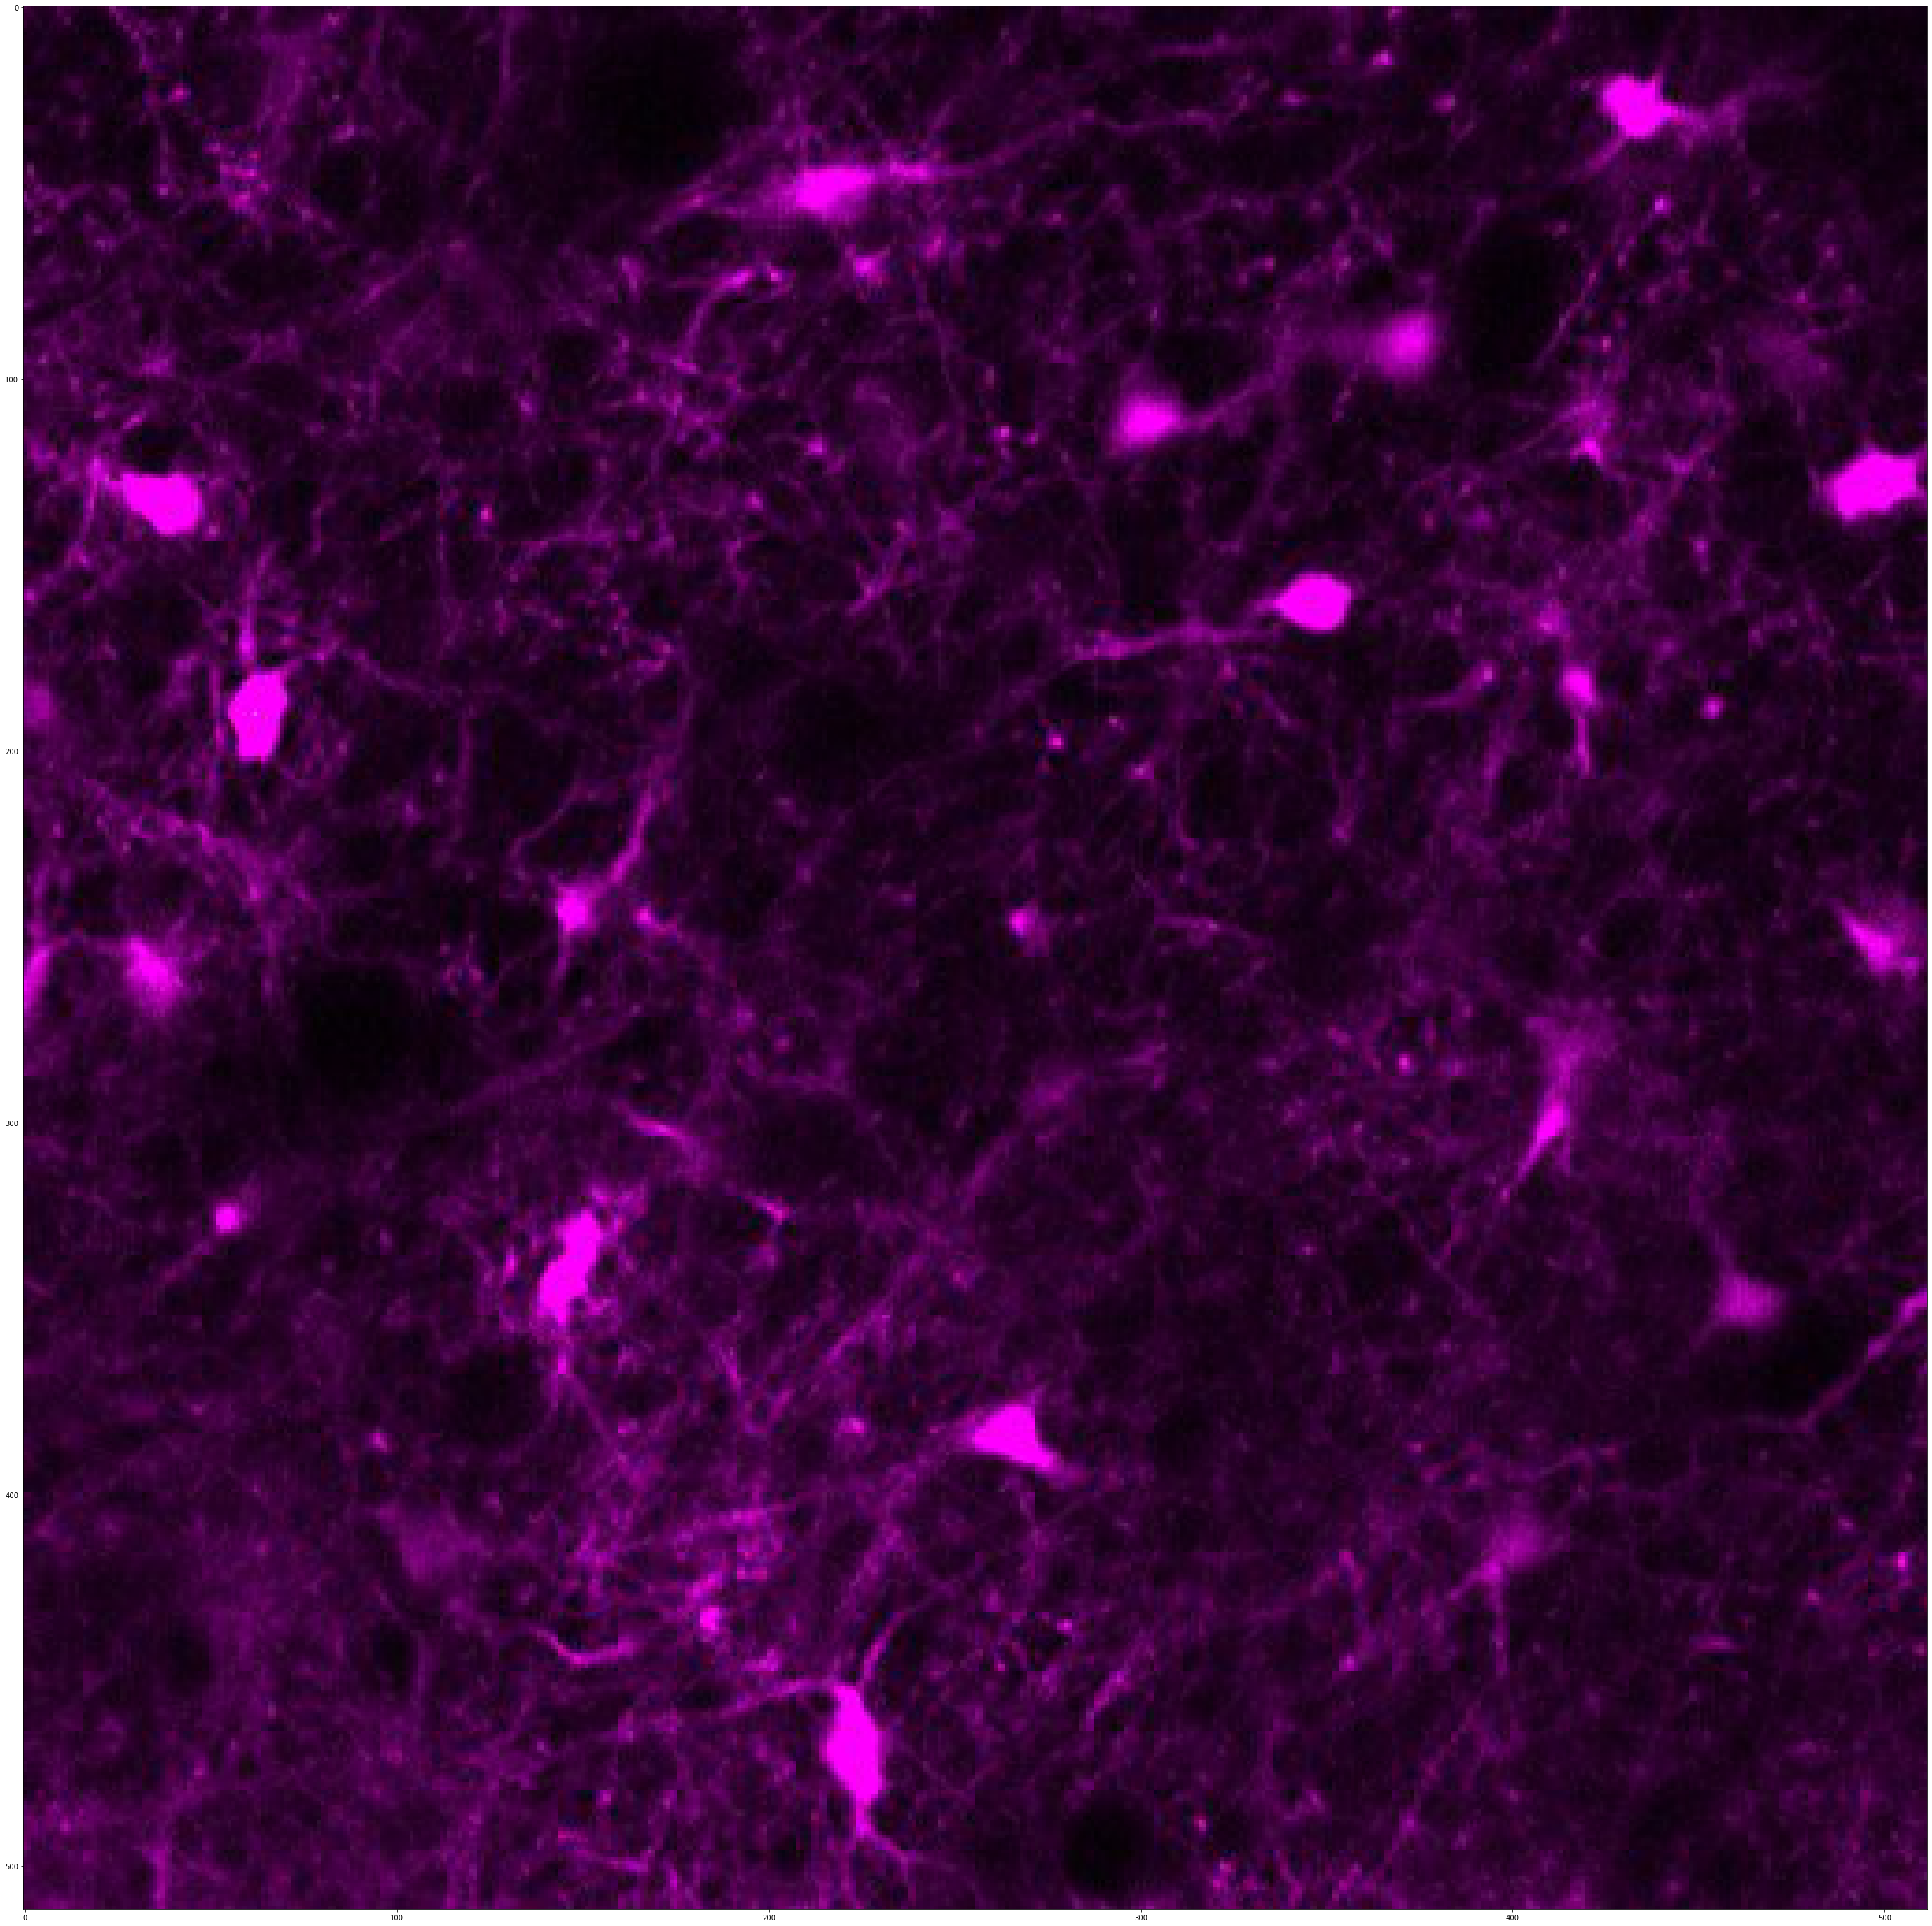

In [372]:
#Load composite.jpeg from path
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-29/2023-07-29_GOS441_t-002/Composite.jpg'
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-06-13/2023-06-13_GOS428_FOV_s-009/Composite_(RGB).jpg'
img = plt.imread(path)
#copy image
imgt =  img.copy()
imgt[:,:,0] = img[:,:,0].T
imgt[:,:,1] = img[:,:,1].T
imgt[:,:,2] = img[:,:,2].T

#Plot the image
plt.figure(figsize=(50,50))
plt.imshow(imgt)
#Save figure in same folder
plt.savefig(Save_path + 'Nkx2-1_Composite_transposed.jpg',dpi=300,format='jpg',bbox_inches='tight')

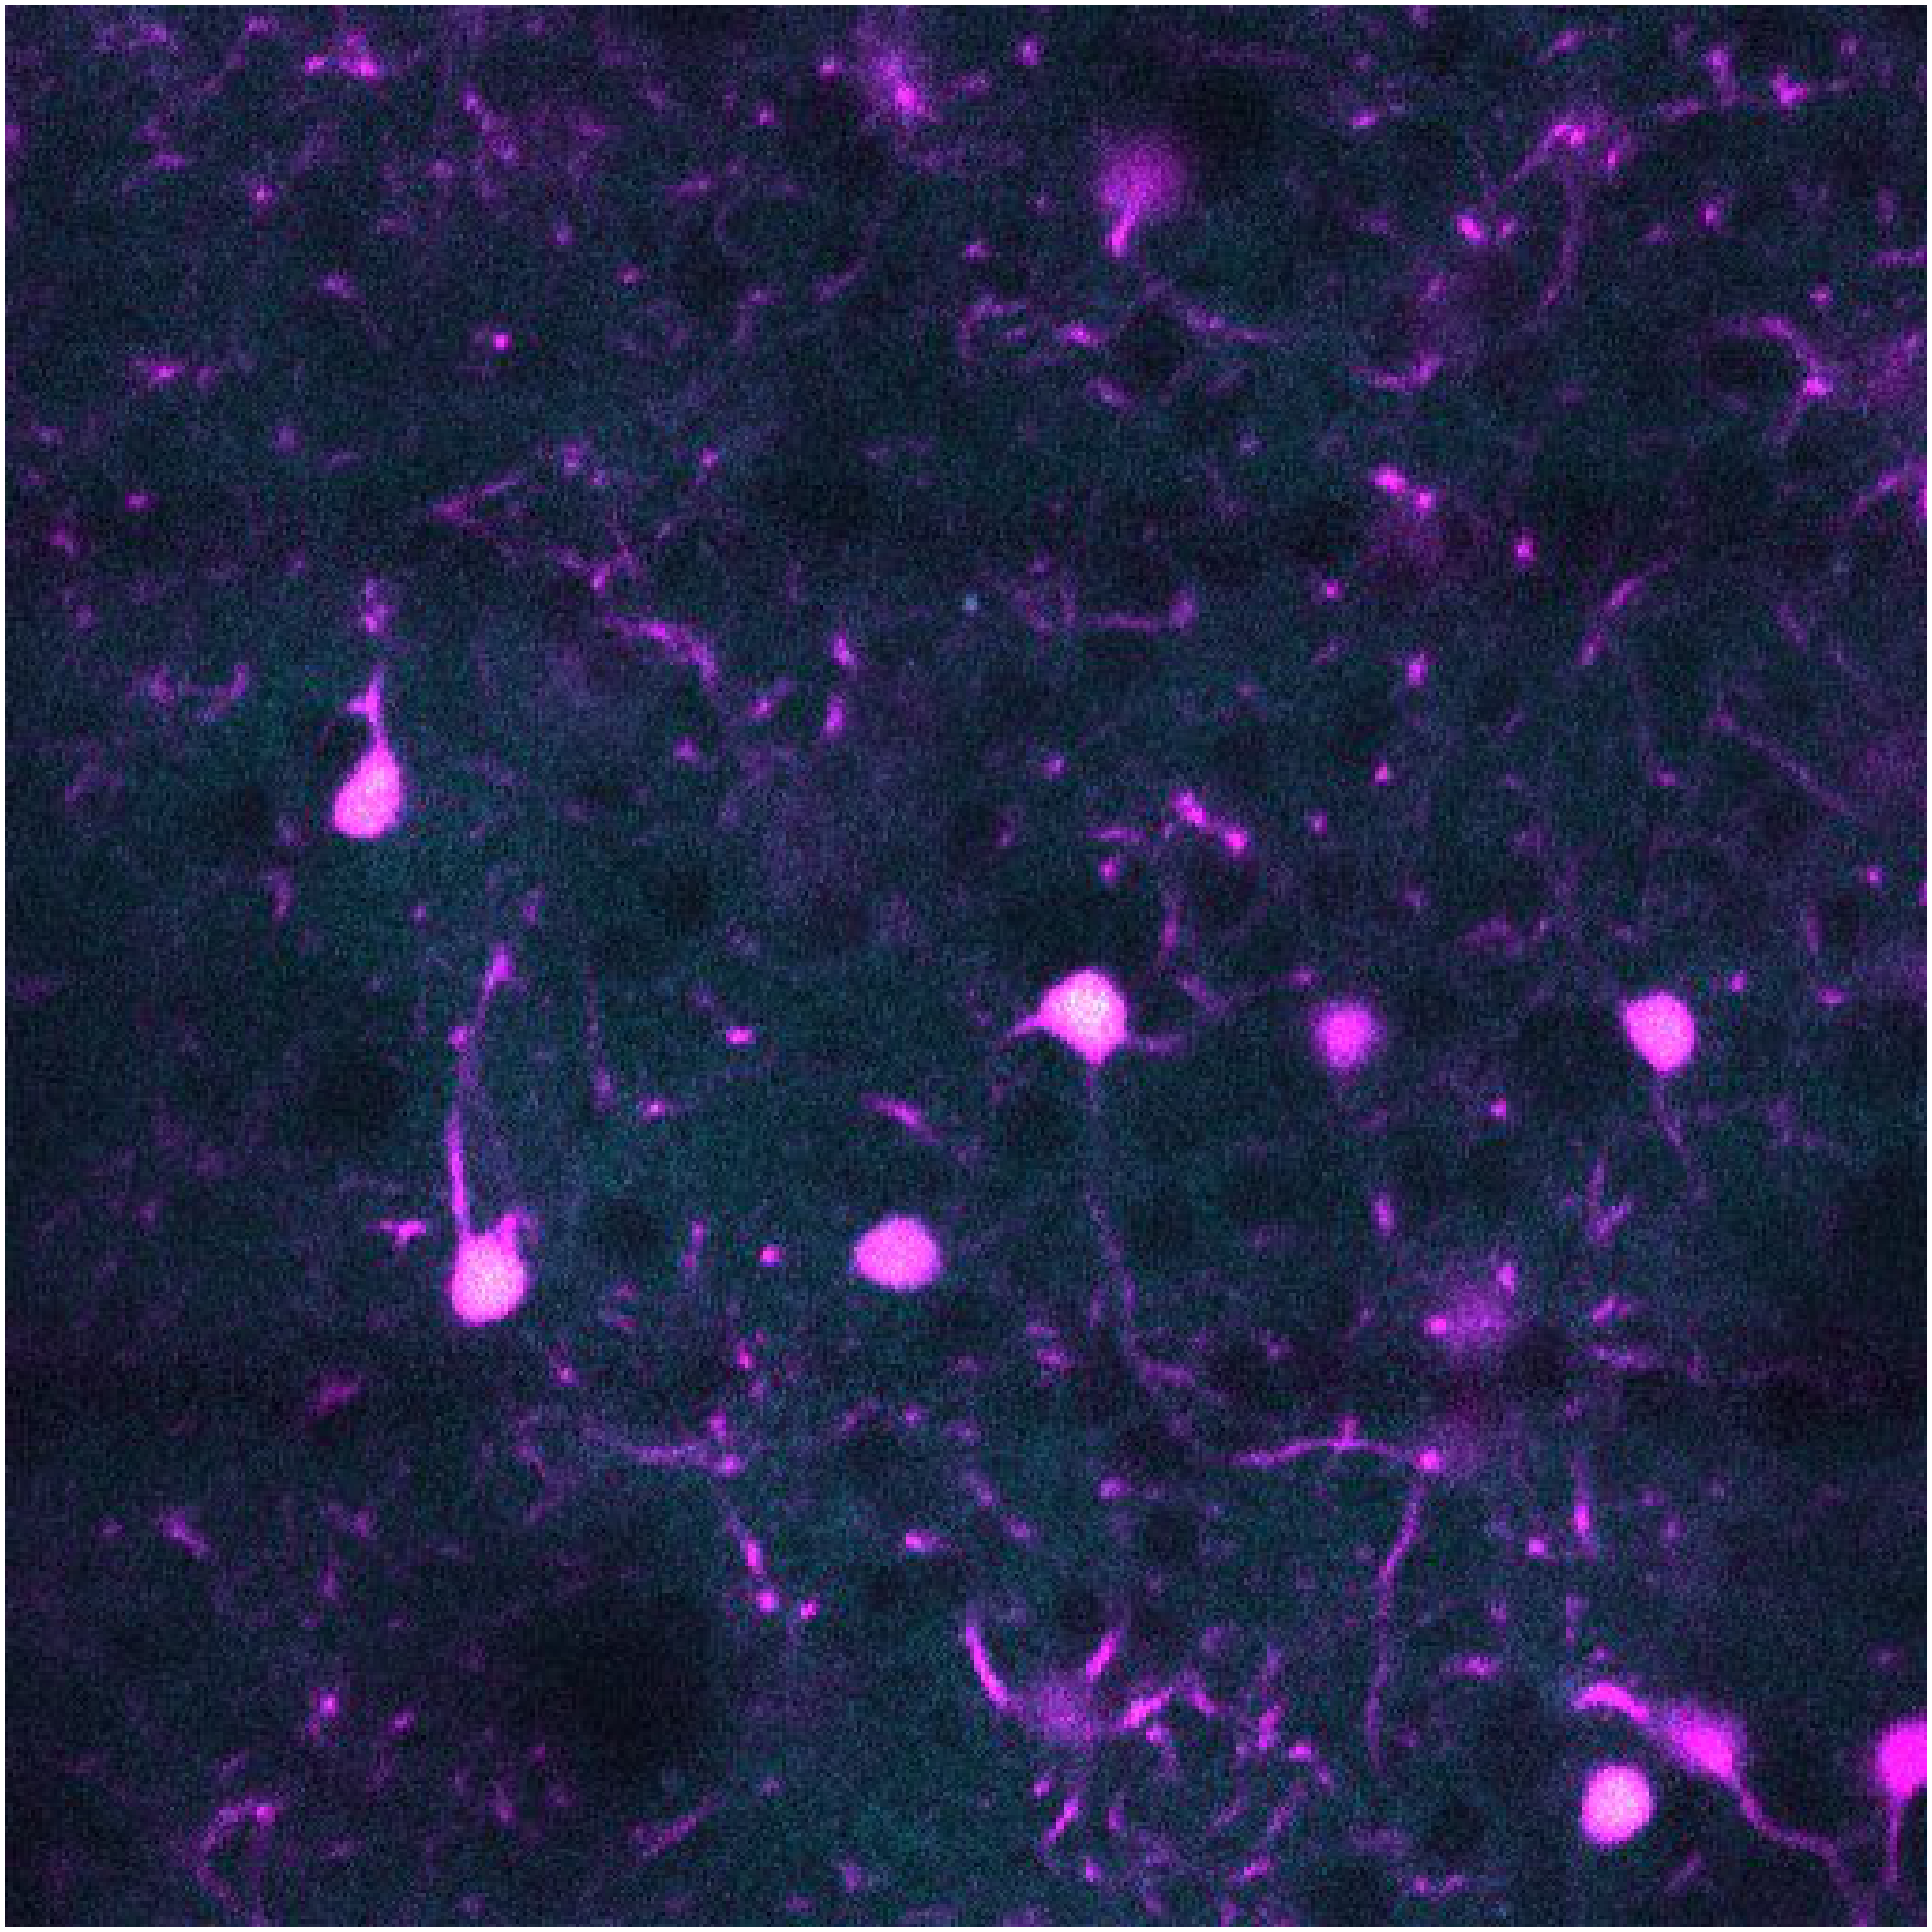

In [629]:
#Load composite.jpeg from path
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-20/2023-07-20_GOS441_t-003/Composite.jpg'
#path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-06-14/2023-06-14_GOS428_t-003/Composite_(RGB).jpg'
img = plt.imread(path)
#copy image
imgt =  img.copy()
imgt[:,:,0] = img[:,:,0].T
imgt[:,:,1] = img[:,:,1].T
imgt[:,:,2] = img[:,:,2].T

#Plot the image
plt.figure(figsize=(50,50))
plt.imshow(imgt)
#Save figure in same folder
#axis off
plt.axis('off')
plt.savefig(Save_path + 'VIP_P11-13_Composite_transposed.jpg',dpi=300,format='jpg',bbox_inches='tight')

In [620]:
recording = 't-003'
path_ter = '_regions_unreg.csv'
path_data = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-20/2023-07-20_GOS441_t-003/'
path_paq = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-20/2023-07-20_GOS441_t_003.paq'
grab = GRAB.GRAB_regions_dataload(path_data, Path_ter ='_regions_reg.csv',num_regions=256,only_CH3=True,detrend_CH2=False,detrend_both=False) # Early on no hemodynamic response, and loading only CH3 cuts loading time by 50%
paq = CaaN.paq_read_function(path_paq)
channel = 'Whisker_in'
meta = CaaN.paq_extract(paq, channel_to_Extract = channel)#'Sound_in'
periS= GRAB.PeriStimFrames(grab,meta, regions = True, minus_fr=5,plus_fr=30,hz=30)


In [621]:
b = np.nanmean(periS,1)
b.shape

(256, 1050)

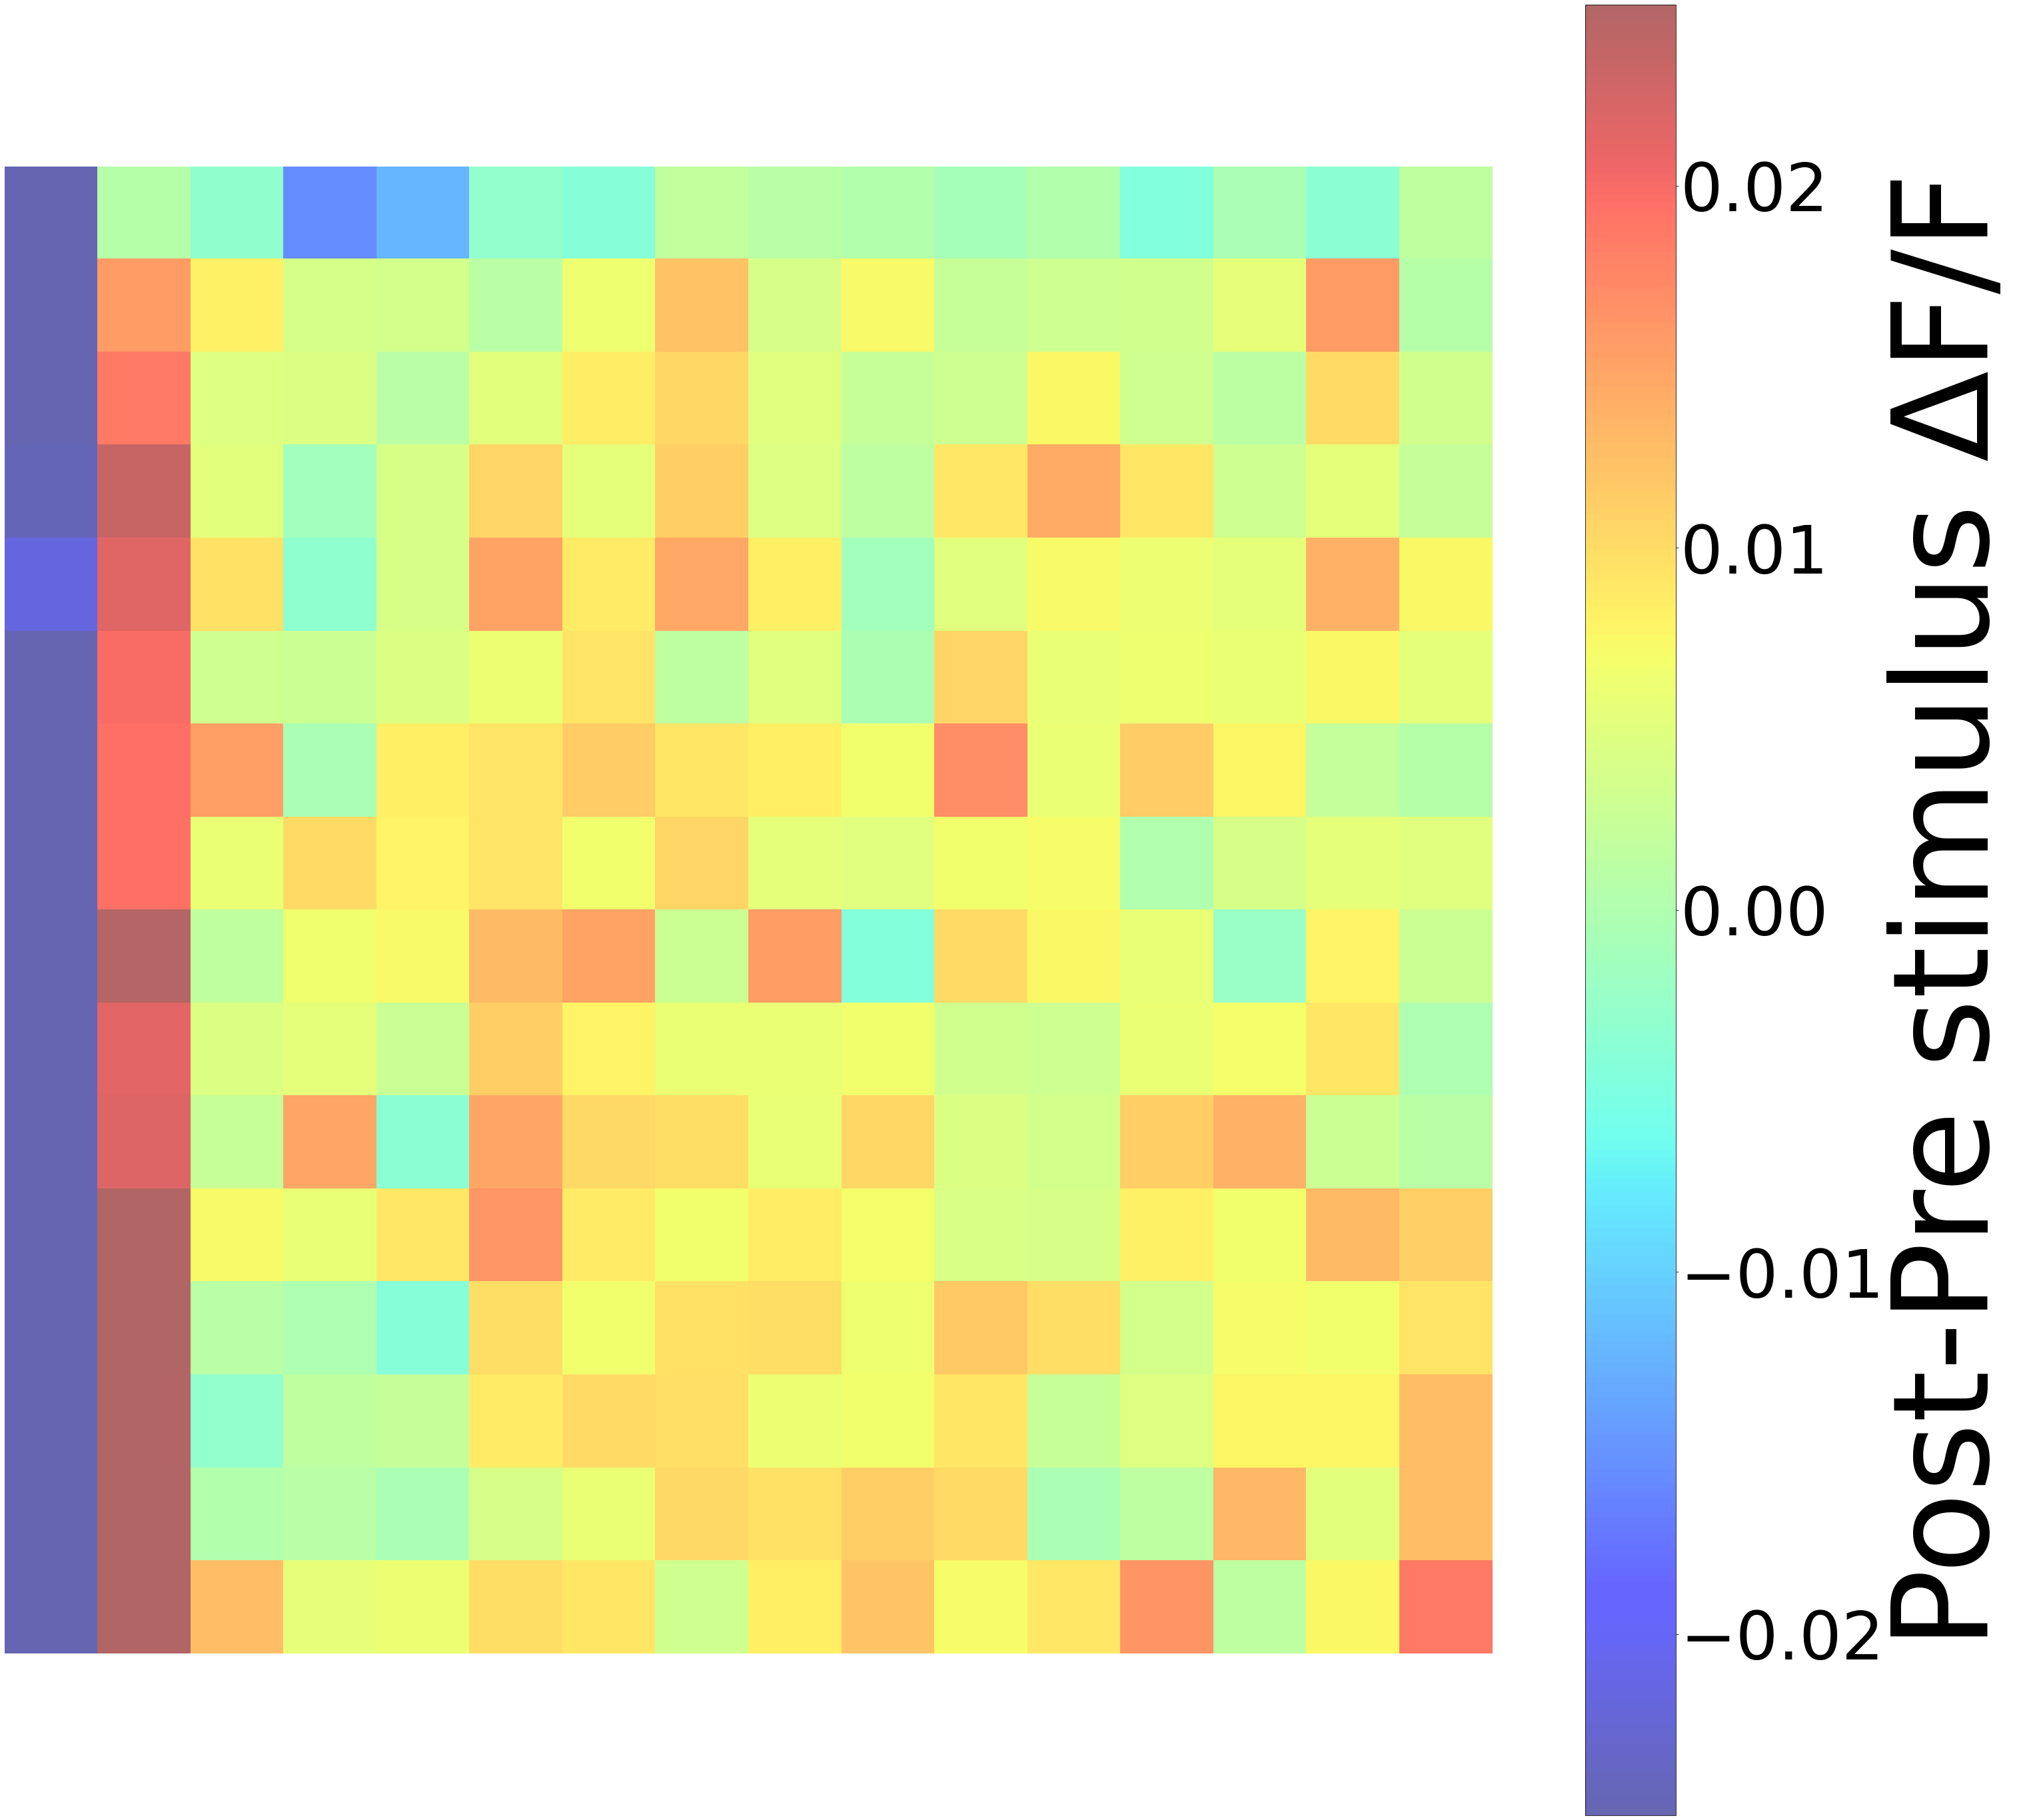

In [630]:
plt.figure(figsize=(50,50))
plt.imshow(np.reshape(np.mean(b[:,150:450],1)-np.mean(b[:,:150],1),(16,16)),cmap='jet',alpha=0.6, vmin = -0.025, vmax = 0.025)
#colorbar with settingsa
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=100)
cbar.set_label('Post-Pre stimulus ΔF/F',size=200)
#axis off
plt.axis('off')
plt.savefig(Save_path + 'VIP_P11-13_color_map.svg',dpi=300,format='svg',bbox_inches='tight')

# SSRI effects on baseline/responses P7-10 and P11-14

## Baseline

### P7-10

In [387]:
Animals = ['427','428','429']
recordings = 1
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-06-15/2023-06-15_GOS'

#Iterate over all the recordings and animals and concatenate horizontally the data obtained from GRAB.GRAB_dataload for each recording in different numpy arrays for each animal
 
for animal in Animals:
    Path = path + animal + '_t-00' + str(recordings)
    data = GRAB.GRAB_dataload(Path,only_CH3=False,detrend_CH2=False,detrend_both=True)
    if animal == Animals[0]:
        Data = data
    else:
        Data = np.vstack((Data,data))

Animals = ['459','460']
recordings = 1
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-08-01/2023-08-01_GOS'

for animal in Animals:
    Path = path + animal + '_t-00' + str(recordings)
    data = GRAB.GRAB_dataload(Path,only_CH3=False,detrend_CH2=False,detrend_both=True)
    Data = np.vstack((Data,data))

Animals = ['455','459']
recordings = 1
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-28/2023-07-28_GOS'

for animal in Animals:
    Path = path + animal + '_t-00' + str(recordings)
    data = GRAB.GRAB_dataload(Path,only_CH3=False,detrend_CH2=False,detrend_both=True)
    Data = np.vstack((Data,data))




### Sleep

In [650]:
path_sleep = 'C:/Users/gabrielos/Desktop/SERTKO_GRAB_recov/Sleep_wake_manual_scoring.csv'
#Load sleep scoring with numpy genfromtxt
sleep_scoring = np.genfromtxt(path_sleep,delimiter=',',usecols = np.arange(0,61))
sleep_scoring = sleep_scoring[1:,3:]

In [ ]:
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/'
dates = ['2023-07-15','2023-07-15','2023-07-15','2023-07-15','2023-07-15','2023-06-15','2023-06-15','2023-08-01','2023-08-01','2023-07-28','2023-06-15','2023-08-01','2023-07-28','2023-04-21','2023-04-21']
animals = ['440','441','442','443','444','427','429','460','463','459','428','459','455','388','390']
recording = 't-001'
sleep_GRAB = np.zeros([3,len(animals)])
sleep_GRAB[sleep_GRAB==0]=np.nan


for i,animal in enumerate(animals):
    date = dates[i]

    grab = GRAB.GRAB_dataload(path + date + '/' + date + '_' + 'GOS' + animal + '_' +recording , detrend_both=False, detrend_CH2=False, only_CH3=True)
    print(path + date + '/' + date + '_' + 'GOS' + animal + '_' +recording)
    
    multiplier = (9*animals.index(animal)) # row for each animal
    #Awake
    awake_end = (sleep_scoring[2+multiplier,:][~np.isnan(sleep_scoring[2+multiplier,:])])*30
    awake_start = (sleep_scoring[1+multiplier,:][~np.isnan(sleep_scoring[1+multiplier,:])])*30

    tmp = np.zeros(len(awake_end))
    tmp[tmp==0]=np.nan

    for aw_period in range(len(awake_end)):
        tmp[aw_period] = np.nanmean(grab[int(awake_start[aw_period]):int(awake_end[aw_period])-300])
    sleep_GRAB[0,i] = np.nanmean(tmp)

    #QS


    qs_end = (sleep_scoring[6+multiplier,:][~np.isnan(sleep_scoring[6+multiplier,:])])*30
    qs_start = (sleep_scoring[5+multiplier,:][~np.isnan(sleep_scoring[5+multiplier,:])])*30

    tmp = np.zeros(len(qs_end))
    tmp[tmp==0]=np.nan

    for qs_period in range(len(qs_end)):
        tmp[qs_period] = np.nanmean(grab[int(qs_start[qs_period]):int(qs_end[qs_period])])
    sleep_GRAB[1,i] = np.nanmean(tmp)

    #AS
    as_times = (sleep_scoring[0+multiplier,:][~np.isnan(sleep_scoring[0+multiplier,:])])*30
    
    #Calculate distance between as_times and select only those are within 20 frames of another one
    #as_times = as_times[np.where(np.diff(as_times)<300)[0]]

    tmp = np.zeros(len(as_times))
    tmp[tmp==0]=np.nan

    for as_period in range(len(as_times)):
        tmp[as_period] = np.nanmean(grab[int(as_times[as_period])-15:int(as_times[as_period]+15)])
    sleep_GRAB[2,i] = np.nanmean(tmp)


                
                

//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-15/2023-07-15_GOS440_t-001


C:\Users\GABRIE~1\AppData\Local\Temp/ipykernel_9604/1446714955.py:24: RuntimeWarning: Mean of empty slice
  tmp[aw_period] = np.nanmean(grab[int(awake_start[aw_period]):int(awake_end[aw_period])-300])


//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-15/2023-07-15_GOS441_t-001
//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-15/2023-07-15_GOS442_t-001
//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-15/2023-07-15_GOS443_t-001
//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-15/2023-07-15_GOS444_t-001
//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-06-15/2023-06-15_GOS427_t-001
//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-06-15/2023-06-15_GOS429_t-001
//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-08-01/2023-08-01_GOS460_t-001
//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-08-01/2023-08-01_GOS463_t-001
//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-28/2023-07-28_GOS459_t-001
//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-06-15/2023-06-15_GOS428_t-001
//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-08-01/2023-08-01_GOS459_t-001
//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-07-28/2023-07-28_GOS455_t-001
//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/2023-04-21/2023-04-21_GOS388_t-001

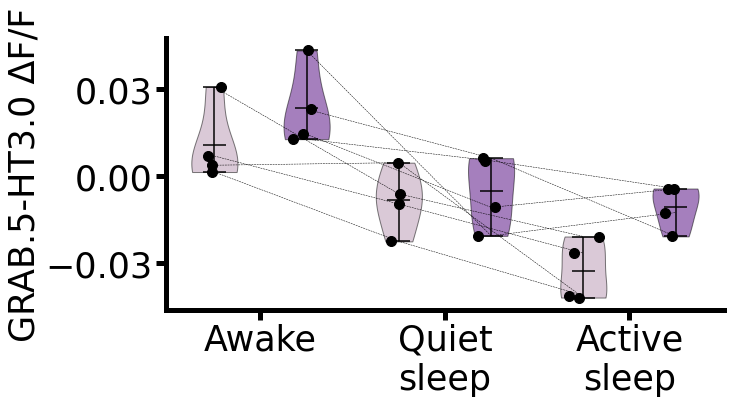

In [511]:
sleep = sleep_GRAB[:3,5:9]
sleep2 = sleep_GRAB[:3,9:13]

#Scatter plot of GRAB signal vs sleep state with dots from each animal connected
plt.figure(figsize=(10,5))

#Violin plot with sleep[0,:] and sleep2[0,:] as first violin and so on
vp = plt.violinplot([sleep[0,:],sleep2[0,:],sleep[1,:],sleep2[1,:],sleep[2,:],sleep2[2,:]],showmeans=True)

#Set colors black
for i,pc in enumerate(vp['bodies']):
    #Set sleep as color1 and sleep2 as color2
    if i%2==0:
        pc.set_facecolor(color1)
        pc.set_edgecolor('k')
        pc.set_alpha(0.5)
    else:
        pc.set_facecolor(color2)
        pc.set_edgecolor('k')
        pc.set_alpha(0.5)
#Make edges black
for partname in ('cbars','cmins','cmaxes','cmeans'):
    vp[partname].set_edgecolor('k')

#scatter with jitter
plt.scatter(np.ones(4)+np.random.normal(0,0.08,4),sleep[0,:],s=100,color='k')
plt.scatter(np.ones(4)*2+np.random.normal(0,0.08,4),sleep2[0,:],s=100,color='k')
plt.scatter(np.ones(4)*3+np.random.normal(0,0.08,4),sleep[1,:],s=100,color='k')
plt.scatter(np.ones(4)*4+np.random.normal(0,0.08,4),sleep2[1,:],s=100,color='k')
plt.scatter(np.ones(4)*5+np.random.normal(0,0.08,4),sleep[2,:],s=100,color='k')
plt.scatter(np.ones(4)*6+np.random.normal(0,0.08,4),sleep2[2,:],s=100,color='k')
#plt.scatter(np.ones(4)*4,sleep[3,:4],s=100,color='k')

#Connect dots from each animal
for i in range(4):
    plt.plot([1,3,5],[sleep[0,i],sleep[1,i],sleep[2,i]],'k--',lw=0.5)
    plt.plot([2,4,6],[sleep2[0,i],sleep2[1,i],sleep2[2,i]],'k--',lw=0.5)


#Set x ticks as sleep states
plt.xticks([1.5,3.5,5.5],['Awake','Quiet\nsleep','Active\nsleep'],fontsize=35)
#Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('GRAB.5-HT3.0 ΔF/F',fontsize=35)
#Make axis thicker
plt.gca().spines['left'].set_linewidth(5)
plt.gca().spines['bottom'].set_linewidth(5)
#Make ticks thicker and longer
plt.tick_params(width=5,length=10)
plt.yticks(np.arange(-0.03,0.031,0.03),fontsize=35)

#Save figure
plt.savefig(Save_path + 'GRAB_5HT_SSRIsleep_scoring.svg',bbox_inches='tight',dpi=300)


In [502]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Shapiro test
from scipy.stats import shapiro
stat, p = shapiro(sleep[0,:])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Create a DataFrame
df = pd.DataFrame({
    'Value': np.concatenate([sleep.flatten(), sleep2.flatten()]),
    'State': np.tile(np.repeat(range(1, 4), 4), 2),
    'Animal': np.tile(range(1, 5), 6),
    'Group': np.repeat(['Group1', 'Group2'], 12)
})

# Perform two-way ANOVA
model = ols('Value ~ C(State) + C(Group) + C(State):C(Group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


Statistics=0.777, p=0.067
                     sum_sq    df          F    PR(>F)
C(State)           0.006069   2.0  21.433764  0.000017
C(Group)           0.000974   1.0   6.879836  0.017246
C(State):C(Group)  0.000349   2.0   1.232301  0.315082
Residual           0.002548  18.0        NaN       NaN


### Proportion of time spent in each sleep state


In [697]:
import utils.BehavAnaly as Behav

In [ ]:
#Bigger bins
# Load training data
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/'
dates = ['2023-07-15','2023-07-15','2023-07-15','2023-07-15','2023-07-15','2023-06-15','2023-06-15','2023-08-01','2023-08-01','2023-07-28','2023-06-15','2023-08-01','2023-07-28']#,'2023-04-21','2023-04-21']
animals = ['440','441','442','443','444','427','429','460','463','459','428','459','455']#,'388','390']
recording = 't-001'

DLC_model_name = 'DLC_resnet50_Pup_Tracking_P7-11_SSRIs_2023-06-27Jun27shuffle1_500000.csv'
#sleep_GRAB = np.zeros([,4])
#sleep_GRAB[sleep_GRAB==0]=np.nan
DLC_folder = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/Behavioural_Recordings/All_csvs/'


bin_s = 6 #seconds
bin_f = 30*bin_s #frames
bins = int(35987/(bin_f))

States  = np.zeros([len(animals),bins+1])
States[States==0]=np.nan

#Augmented data by shifting 1.5s/45 frames
States_shifted  = np.zeros([len(animals),bins+1])
States_shifted[States_shifted==0]=np.nan

mov = np.zeros([len(animals),3,37000])
mov[mov==0]=np.nan
conf = np.zeros([len(animals),3,37000])
conf[conf==0]=np.nan

for i, animal in enumerate(animals):
    date = dates[i]
    #print('2023-07-15-GOS440-t-001-2023-07-15-160458-0000DLC-resnet50-Pup-Tracking-P7-11-SSRIs-2023-06-27Jun27shuffle1-500000.csv')
    mov_ind , conf_ind = Behav.movement_for_ANN([date],[animal],['t-001'],path =DLC_folder,DLC_model_name = DLC_model_name.replace('_','-'),
                                                weight_marker=False, confidence_filter=False)
    mov[i,:,:mov_ind.shape[1]] = mov_ind
    conf[i,:,:conf_ind.shape[1]] = conf_ind

for i,animal in enumerate(animals):
    date = dates[i]
    if i == 0:
        grab = GRAB.GRAB_dataload(path + date + '/' + date + '_' + 'GOS' + animal + '_' +recording , detrend_both=False, detrend_CH2=False, only_CH3=True)
       
    multiplier = (9*i) # row for each animal

    #Awake
    awake_end = (sleep_scoring[2+multiplier,:][~np.isnan(sleep_scoring[2+multiplier,:])])*30
    awake_start = (sleep_scoring[1+multiplier,:][~np.isnan(sleep_scoring[1+multiplier,:])])*30


    #QS

    qs_end = (sleep_scoring[6+multiplier,:][~np.isnan(sleep_scoring[6+multiplier,:])])*30
    qs_start = (sleep_scoring[5+multiplier,:][~np.isnan(sleep_scoring[5+multiplier,:])])*30


    #AS
    as_times = (sleep_scoring[0+multiplier,:][~np.isnan(sleep_scoring[0+multiplier,:])])*30
    
    #Calculate distance between as_times and select only those are within 20 frames of another one

    
    State = np.zeros(int(len(grab)/bin_f)+1)#*4
    State[State==0]=np.nan
    State[(as_times/bin_f).astype(int)] = 2

    for y in range(len(awake_start)):
        State[int(awake_start[y]/bin_f):int(awake_end[y]/bin_f)]=0

    for y in range(len(qs_start)):
        State[int(qs_start[y]/bin_f):int(qs_end[y]/bin_f)]=1

    States[i,:bins] = State[:bins]






In [794]:
state_flu = States[5:9,:]
state_suc = States[9:13,:]

flu = np.concatenate([np.nanmean(state_flu==0,axis=1)[:,np.newaxis],np.nanmean(state_flu==1,axis=1)[:,np.newaxis],np.nanmean(state_flu==2,axis=1)[:,np.newaxis]],axis=1)
suc = np.concatenate([np.nanmean(state_suc==0,axis=1)[:,np.newaxis],np.nanmean(state_suc==1,axis=1)[:,np.newaxis],np.nanmean(state_suc==2,axis=1)[:,np.newaxis]],axis=1)

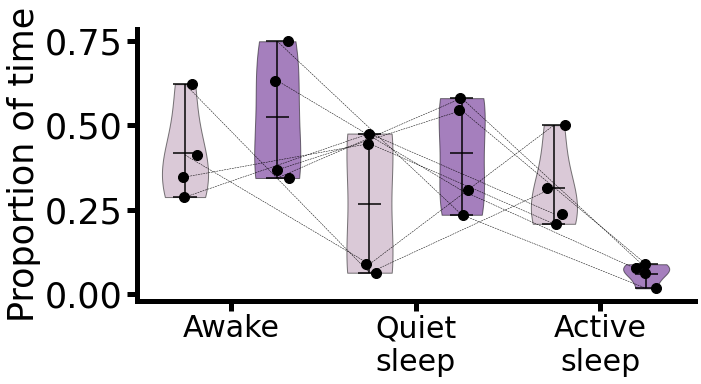

In [799]:
plt.figure(figsize=(10,5))
#Make 4 nans
state_flu[state_flu==np.nan]=[]
state_suc[state_suc==np.nan]=[]
to_plot = [np.nanmean(state_suc==0,axis=1),np.nanmean(state_flu==0,axis=1),np.nanmean(state_suc==1,axis=1),np.nanmean(state_flu==1,axis=1),np.nanmean(state_suc==2,axis=1),np.nanmean(state_flu==2,axis=1)]
to_plot = [np.nansum(state_suc==0,axis=1)/np.nansum(~np.isnan(state_suc),axis=1), np.nansum(state_flu==0,axis=1)/np.nansum(~np.isnan(state_flu),axis=1), np.nansum(state_suc==1,axis=1)/np.nansum(~np.isnan(state_suc),axis=1), np.nansum(state_flu==1,axis=1)/np.nansum(~np.isnan(state_flu),axis=1), np.nansum(state_suc==2,axis=1)/np.nansum(~np.isnan(state_suc),axis=1), np.nansum(state_flu==2,axis=1)/np.nansum(~np.isnan(state_flu),axis=1)]
for count, i in enumerate(to_plot):
    vp = plt.violinplot(i,positions = [count+1],showmeans=True)
    #set color as color1 and color2 for each pair
    if count in [0,2,4]:
        color = color1
    else:
        color = color2
    for pc in vp['bodies']:
        pc.set_facecolor(color)
        pc.set_edgecolor('k')
        pc.set_alpha(0.5)
    for partname in ('cbars','cmins','cmaxes','cmeans'):
        vp[partname].set_edgecolor('k')
    plt.scatter(np.ones(4)*count+1+np.random.normal(0,0.08,4),i,s=100,color='k')

# Plot lines connecting each animal
for i in range(4):
    plt.plot([1,3,5],[to_plot[0][i],to_plot[2][i],to_plot[4][i]],'k--',lw=0.5)
    plt.plot([2,4,6],[to_plot[1][i],to_plot[3][i],to_plot[5][i]],'k--',lw=0.5)

plt.xticks([1.5,3.5,5.5],['Awake','Quiet\nsleep','Active\nsleep'],fontsize=30)
#remove top and right axis
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Proportion of time',fontsize=35)
#make axis thicker
ax.spines['bottom'].set_linewidth(5)
ax.spines['left'].set_linewidth(5)
#make tick fonts thicker
plt.yticks(np.arange(0,0.76,0.25),fontsize=35)
plt.tick_params(width=5,length=10)

plt.savefig(Save_path + 'Sleep_states_SSRIs.svg',bbox_inches='tight',dpi=300)




In [796]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Shapiro test
from scipy.stats import shapiro
stat, p = shapiro(suc.T.flatten())
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Create a DataFrame
df = pd.DataFrame({
    'Value': np.concatenate([suc.T.flatten(), flu.T.flatten()]),
    'State': np.tile(np.repeat(range(1, 4), 4), 2),
    'Animal': np.tile(range(1, 5), 6),
    'Group': np.repeat(['Group1', 'Group2'], 12)
})

# Perform two-way ANOVA
model = ols('Value ~ C(State) + C(Group) + C(State):C(Group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


Statistics=0.976, p=0.961
                     sum_sq    df         F    PR(>F)
C(State)           0.182127   2.0  6.951415  0.005794
C(Group)           0.039204   1.0  2.992684  0.100751
C(State):C(Group)  0.121902   2.0  4.652751  0.023507
Residual           0.235800  18.0       NaN       NaN


In [797]:
shapiro(flu[:,2]-suc[:,2])

ShapiroResult(statistic=0.979725182056427, pvalue=0.9004049301147461)

In [801]:

# Pairwise comparisons for 'State'
tukey_state = pairwise_tukeyhsd(endog=df['Value'], groups=df['State'], alpha=0.05)
print("Pairwise comparisons for State:")
print(tukey_state)

# # Pairwise comparisons for 'Group'
print("\nSimple effects analysis for Group:")
#Simple effect analysis due to the interaction effect but no Group effect
#print ttest
print(stats.ttest_ind(suc[:,0],flu[:,0]))
print(stats.ttest_ind(suc[:,1],flu[:,1]))
print(stats.ttest_ind(suc[:,2],flu[:,2]))




Pairwise comparisons for State:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0975 0.3504 -0.2707  0.0757  False
     1      3  -0.2131 0.0143 -0.3863 -0.0399   True
     2      3  -0.1156 0.2354 -0.2888  0.0576  False
----------------------------------------------------

Simple effects analysis for Group:
Ttest_indResult(statistic=-1.6905191724626398, pvalue=0.14188425376878125)
Ttest_indResult(statistic=-2.3690896845346714, pvalue=0.055589735400803475)
Ttest_indResult(statistic=3.395527647755534, pvalue=0.014575998317434717)


## Responses

In [193]:
Peristim_WTs = PeriStim.copy()

In [ ]:
path = '//qnap-amp001.dpag.ox.ac.uk/gsantero/Data/'
dates = ['2023-06-15']
animals = ['427','428','429']
recordings = ['t-002']
channel = 'Sound_in'
plt.figure(figsize=(20,20))
PeriStim = np.zeros((3,len(animals)+4,10,1050))
for i in range(3):
    if i == 1:
        channel = 'Whisker_in'
    elif i == 2:
        recordings = ['t-003']
    for animal in animals:
        for date in dates:
            for recording in recordings:
                grab = GRAB.GRAB_dataload(path + date + '/' + date + '_' + 'GOS' + animal + '_' +recording , detrend_both=False, detrend_CH2=False, only_CH3=True)
                paq = CaaN.paq_read_function(path + date + '/' + date + '_' + 'GOS' + animal + '_' + recording.replace('-','_') + '.paq')
                Meta = CaaN.paq_extract(paq, channel_to_Extract = channel)#'Sound_in'
                PeriStim[i,animals.index(animal),:,:] = GRAB.PeriStimFrames(grab,Meta,minus_fr=5,plus_fr=30,hz=30) # 30.49
                #plt.plot(np.nanmean(PeriStim,0),label=animal,lw=3)


    date = '2023-08-01'
    animals2 = ['459','460']
    for animal in animals2:
        grab = GRAB.GRAB_dataload(path + date + '/' + date + '_' + 'GOS' + animal + '_' +recording , detrend_both=False, detrend_CH2=False, only_CH3=True)
        paq = CaaN.paq_read_function(path + date + '/' + date + '_' + 'GOS' + animal + '_' + recording.replace('-','_') + '.paq')
        Meta = CaaN.paq_extract(paq, channel_to_Extract = channel)#'Sound_in'
        PeriStim[i,3 + animals2.index(animal),:,:] = GRAB.PeriStimFrames(grab,Meta,minus_fr=5,plus_fr=30,hz=30)

    Animals = ['455','459']
    date = '2023-07-28'

    for animal in Animals:
        grab = GRAB.GRAB_dataload(path + date + '/' + date + '_' + 'GOS' + animal + '_' +recording , detrend_both=False, detrend_CH2=False, only_CH3=True)
        paq = CaaN.paq_read_function(path + date + '/' + date + '_' + 'GOS' + animal + '_' + recording.replace('-','_') + '.paq')
        Meta = CaaN.paq_extract(paq, channel_to_Extract = channel)#'Sound_in'
        PeriStim[i,5 + Animals.index(animal),:,:] = GRAB.PeriStimFrames(grab,Meta,minus_fr=5,plus_fr=30,hz=30)
        
    

<Figure size 1440x1440 with 0 Axes>

In [411]:
from scipy.stats import shapiro
stims = ['Sound','Whisker','Air_puff']
control_p = np.zeros((3,20))
control_p[control_p == 0] = np.nan
ssri_p = np.zeros((3,20))
ssri_p[ssri_p == 0] = np.nan
for y in range(3):
    print('Stim: ' + stims[y])
    Peri_stim_stats = np.nanmean(PeriStim_ssri_nor[y],1)
    a,b = shapiro(np.nanmean(Peri_stim_stats[:,:60],1))#-np.nanmean(Peri_stim_stats[:,240:390],1))

    #print(b)
    for i in range(1,21):
        Peri_stim_stats = np.nanmean(PeriStim_ssri_nor[y],1)
        print(str(i) + ' seconds post stim:')
        if b > 0.05:
            #Run paired t-test
            from scipy.stats import ttest_rel
            t, p = ttest_rel(np.nanmean(Peri_stim_stats[:,120:150],1),np.nanmean(Peri_stim_stats[:,150+((i-1)*30):150+(i*30)],1),alternative='less')
            print('ssri: ' + str(p))
            ssri_p[y,i-1] = p
        if b < 0.05:
            #Run Wilcoxon signed-rank test
            from scipy.stats import wilcoxon
            t, p = wilcoxon(np.nanmean(Peri_stim_stats[:,120:150],1),np.nanmean(Peri_stim_stats[:,150+((i-1)*30):150+(i*30)],1))
            print('ssri: ' + str(p))
            ssri_p[y,i-1] = p

        Peri_stim_stats = np.nanmean(PeriStim_control_nor[y],1)
        #a,b = shapiro(np.nanmean(Peri_stim_stats[:,:60],1))#-np.nanmean(Peri_stim_stats[:,240:390],1))
        #print(b)

        if b > 0.05:
            #Run paired t-test
            from scipy.stats import ttest_rel
            t, p = ttest_rel(np.nanmean(Peri_stim_stats[:,120:150],1),np.nanmean(Peri_stim_stats[:,150+((i-1)*30):150+(i*30)],1),alternative='less')
            print('control: ' + str(p))
            control_p[y,i-1] = p
        if b < 0.05:
            #Run Wilcoxon signed-rank test
            from scipy.stats import wilcoxon
            t, p = wilcoxon(np.nanmean(Peri_stim_stats[:,120:150],1),np.nanmean(Peri_stim_stats[:,150+((i-1)*30):150+(i*30)],1))
            print('control: ' + str(p))
            control_p[y,i-1] = p

Stim: Sound
1 seconds post stim:
ssri: 0.578694231166514
control: 0.5255016142333743
2 seconds post stim:
ssri: 0.5828351110594217
control: 0.8389427914616412
3 seconds post stim:
ssri: 0.436913479426549
control: 0.5252129009937853
4 seconds post stim:
ssri: 0.7398565475216023
control: 0.9219297322942834
5 seconds post stim:
ssri: 0.5553167892473593
control: 0.9297925650154709
6 seconds post stim:
ssri: 0.6861062953269901
control: 0.9197696976684148
7 seconds post stim:
ssri: 0.8581546705322622
control: 0.9844754524040857
8 seconds post stim:
ssri: 0.9840781744243345
control: 0.9905653188970492
9 seconds post stim:
ssri: 0.9662580957618055
control: 0.9949320873838147
10 seconds post stim:
ssri: 0.871251415248572
control: 0.988327334157625
11 seconds post stim:
ssri: 0.7498684691784199
control: 0.940968194675137
12 seconds post stim:
ssri: 0.8041013912003183
control: 0.9765074567287815
13 seconds post stim:
ssri: 0.7775338742810162
control: 0.9033376132667594
14 seconds post stim:
ssri:

C:\Users\GABRIE~1\AppData\Local\Temp/ipykernel_9604/265583453.py:7: RuntimeWarning: Mean of empty slice
  PeriStim_control_nor = Peristim_control - np.nanmean(Peristim_control[:,:,:,:150],axis=(3)).reshape(3,4,10,1)
C:\Users\GABRIE~1\AppData\Local\Temp/ipykernel_9604/265583453.py:8: RuntimeWarning: Mean of empty slice
  PeriStim_ssri_nor = Peristim_ssri - np.nanmean(Peristim_ssri[:,:,:,:150],axis=(3)).reshape(3,3,10,1)


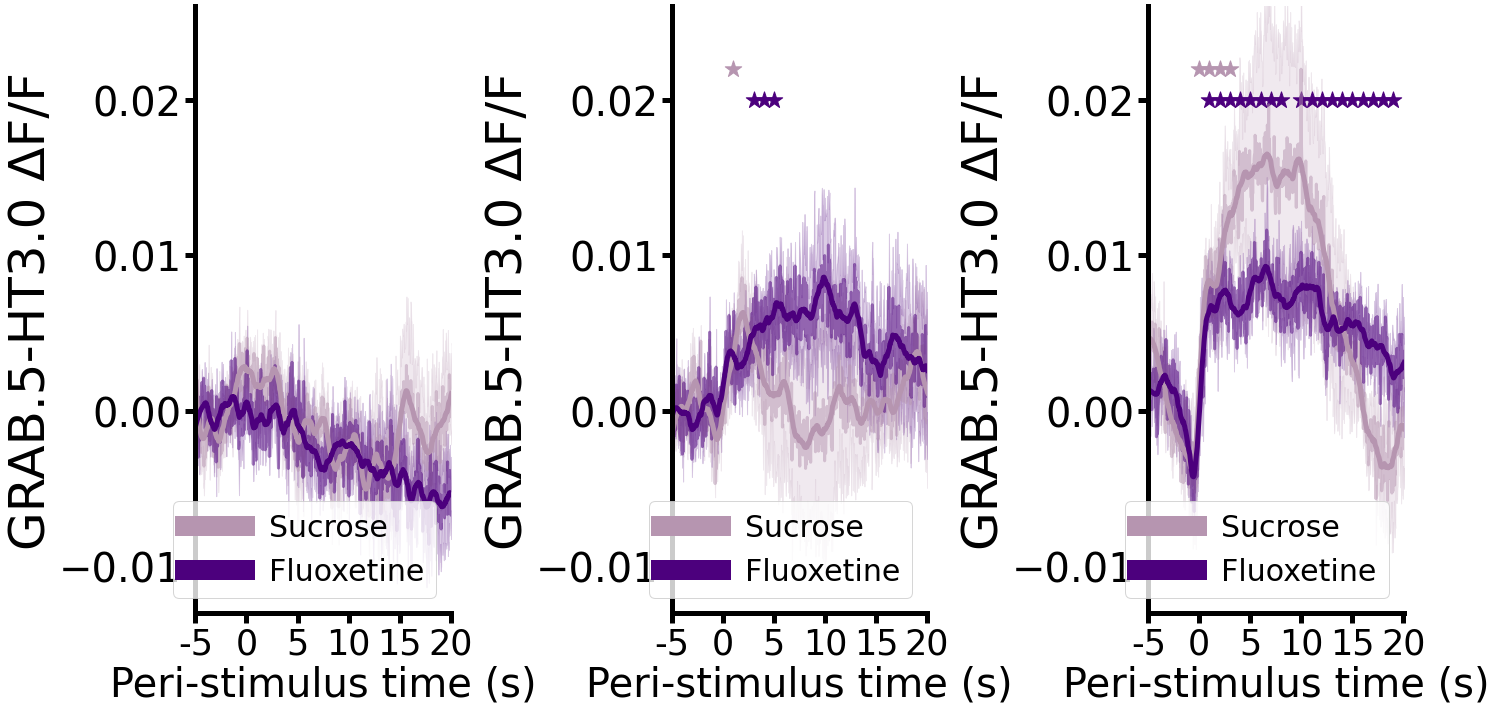

In [414]:
#Plot whisker, airruff and sound together
plt.figure(figsize=(20,10))
Peristim_control = PeriStim[:,[1,3,5,6],:,:]
#Append Perstim_WTs to PeriStim control
#Peristim_control = np.append(Peristim_control,Peristim_WTs,axis=1)
Peristim_ssri = PeriStim[:,[0,2,4],:,:]
PeriStim_control_nor = Peristim_control - np.nanmean(Peristim_control[:,:,:,:150],axis=(3)).reshape(3,4,10,1)
PeriStim_ssri_nor = Peristim_ssri - np.nanmean(Peristim_ssri[:,:,:,:150],axis=(3)).reshape(3,3,10,1)
for i in range(3):
    plt.subplot(1,3,i+1) # Sound
    plt.plot(np.nanmean(PeriStim_control_nor[i],(0,1)),color=color1,lw=3,alpha=0.5)
    plt.plot(np.nanmean(PeriStim_ssri_nor[i],(0,1)),color=color2,lw=3,alpha=0.5)
    #Plot shaded S.E.M
    plt.fill_between(np.arange(1050),np.nanmean(PeriStim_control_nor[i],(0,1))-np.nanstd(np.nanmean(PeriStim_control_nor[i],1),0)/np.sqrt(len(animals)),np.nanmean(PeriStim_control_nor[i],(0,1))+np.nanstd(np.nanmean(PeriStim_control_nor[i],1),0)/np.sqrt(len(animals)),color=color1,alpha=0.2)
    plt.fill_between(np.arange(1050),np.nanmean(PeriStim_ssri_nor[i],(0,1))-np.nanstd(np.nanmean(PeriStim_ssri_nor[i],1),0)/np.sqrt(len(animals)),np.nanmean(PeriStim_ssri_nor[i],(0,1))+np.nanstd(np.nanmean(PeriStim_ssri_nor[i],1),0)/np.sqrt(len(animals)),color=color2,alpha=0.2)
    #Plot savgol filtered signal
    plt.plot(signal.savgol_filter(np.nanmean(PeriStim_control_nor[i],(0,1)),51,3),color=color1,lw=5, label = 'Sucrose')
    plt.plot(signal.savgol_filter(np.nanmean(PeriStim_ssri_nor[i],(0,1)),51,3),color=color2,lw=5, label = 'Fluoxetine')

    # plot significance
    for p in range(20):
        if ssri_p[i,p] < 0.05:
            plt.scatter(150+(p*30),0.02, color = color2,s=300, marker = '*')
        if control_p[i,p] < 0.05:
            plt.scatter(150+(p*30),0.022, color = color1,s=300, marker = '*')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #make axis lines and ticks thicker
    ax.spines['left'].set_linewidth(5.0)
    ax.spines['bottom'].set_linewidth(5.0)
    ax.tick_params(width=5.0,length=10.0)
    #Set xticks from -2 s to 20 s, every 2 given a framerate of 30Hz
    plt.xticks(np.arange(0,751,150),np.arange(-5,21,5),fontsize=35)
    plt.ylim([-0.013,0.026])
    plt.yticks(np.arange(-0.01,0.026, 0.01),fontsize=40)
    plt.ylabel('GRAB.5-HT3.0 ΔF/F',fontsize=50)
    plt.xlabel('Peri-stimulus time (s)',fontsize=40)
    leg = plt.legend(fontsize=30, loc='lower right')
    for line in leg.get_lines():
        line.set_linewidth(20.0)
    
    plt.xlim([0,751])

plt.tight_layout()
plt.savefig(Save_path + 'P10_SSRI_AllStims.svg',bbox_inches='tight',format='svg',dpi=300)